In [2363]:
# imports
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2364]:
# first we import the libraries 

In [2365]:
dataset = pd.read_csv(r"C:\Users\zalaswad\Desktop\Course\Project\baseball_teams.csv",index_col=None)

In [2366]:
# we pull the file that we need to test the data for 

In [2367]:
new_dataset=dataset.loc[2:720]

In [2368]:
# Data for period before 1920 

In [2369]:
new_dataset.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   719.000000      719.000000    719.000000  322.000000  719.000000  719.000000   719.000000   719.000000   719.000000  719.000000  719.000000  719.000000  719.000000   599.000000    575.000000        62.000000           0.0            0.0    719.000000   719.000000          719.000000      719.000000  719.000000  719.000000        719.000000    719.000000        719.000000     719.000000          719.000000  719.000000    404.000000           719.000000  4.420000e+02
mean   1897.883171        4.909597    128.702364   75.279503   63.226704   63.257302   615.005563  4404.087622  1143.404729  162.955494   65.517385   23.951321  340.468707   394.272120    198.563478        86.032258           NaN            NaN    615.285118   408.276773            3.266300       98.550765    9.285118    4.019471       3415.598053   1143.182197         23.990264     342.279555          425.700974  335.426982     93.913366             0.924576  3.160595e+05
std      13.937194        2.710529     34.795749    4.897340   23.045735   22.318516   188.309996  1073.918017   299.187938   50.226542   24.924776   16.318099  158.152711   181.609391     86.656009        60.265524           NaN            NaN    184.582517   146.511590            0.909916       27.561729    6.628056    4.527189        928.104009    294.121006         14.521089     160.817916          189.135980  108.223049     26.191790             0.038863  1.709388e+05
min    1871.000000        1.000000      6.000000   52.000000    0.000000    4.000000    24.000000   211.000000    33.000000    3.000000    0.000000    0.000000    0.000000     0.000000      0.000000         0.000000           NaN            NaN     34.000000    25.000000            1.220000        6.000000    0.000000    0.000000        162.000000     49.000000          0.000000       0.000000            0.000000   47.000000     18.000000             0.760000  6.088000e+03
25%    1886.000000        3.000000    124.000000   74.000000   50.000000   49.000000   505.000000  4173.000000  1049.500000  140.000000   50.000000   13.000000  260.500000   288.000000    148.500000        16.500000           NaN            NaN    498.000000   331.000000            2.645000       81.000000    4.000000    0.000000       3214.500000   1033.500000         13.000000     252.000000          306.500000  252.000000     80.000000             0.910000  1.896018e+05
50%    1898.000000        5.000000    139.000000   77.000000   66.000000   64.000000   619.000000  4833.000000  1233.000000  169.000000   67.000000   21.000000  376.000000   408.000000    188.000000        97.000000           NaN            NaN    604.000000   424.000000            3.080000      104.000000    8.000000    2.000000       3666.000000   1233.000000         22.000000     382.000000          461.000000  317.000000     97.000000             0.940000  2.829085e+05
75%    1910.000000        7.000000    154.000000   78.000000   80.000000   78.000000   739.000000  5080.500000  1332.000000  194.000000   83.000000   32.000000  453.500000   536.000000    241.000000       128.750000           NaN            NaN    734.500000   504.000000            3.750000      118.000000   13.000000    6.000000       4108.500000   1327.500000         33.000000     457.500000          558.000000  417.000000    112.000000             0.950000  4.092308e+05
max    1921.000000       13.000000    162.000000   84.000000  116.000000  134.000000  1220.000000  5495.000000  1732.000000  300.000000  150.000000  142.000000  681.000000   863.000000    5

In [2370]:
# pulled statistics for these years by using the function describe 

In [2371]:
x_train, x_test, y_train, y_test = train_test_split(new_dataset, new_dataset['Games_Won'],test_size=0.3, random_state=0)

In [2372]:
x_train.set_index('Year ')

League Team  Franchise  Division  Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost Unnamed: 10 Unnamed: 11 League_Win World_Series  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games  Shutout  Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage                 Team_Name               Home_Ball_Park  Attendance
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1910      AL   WS1        MIN      NaN               7           157        77.0         66          85         NaN         NaN      False        False          501     4989  1175      145       46          9    449          NaN         192.0              NaN           NaN            NaN           550          375                2.46             119       19      3              4119          1215                19            375                 674     264          99.0                 0.95       Washington Senators      American League Park II    254591.0
1885      NL   CHN        CHC      NaN               1           113         NaN         87          25         NaN         NaN       True        False          834     4093  1079      184       75         54    340        429.0           NaN              NaN           NaN            NaN           470          251                2.23             108       14      4              3045           868                37            202                 458     497           NaN                 0.90   Chicago White Stockings             West Side Park I         NaN
1898      NL   LS3        LOU      NaN               9           154         NaN         70          81         NaN         NaN      False          NaN          728     5193  1389      150       71         32    375        429.0         235.0              NaN           NaN            NaN           833          628                4.24             137        4      0              4002          1457                33            470                 271     382           NaN                 0.93       Louisville Colonels              Eclipse Park II    128980.0
1880      NL   CHN        CHC      NaN               1            86         NaN         67          17         NaN         NaN       True          NaN          538     3135   876      164       39          4    104        217.0           NaN              NaN           NaN            NaN           317          166                1.93              80        8      3              2325           622                 8            129                 367     329          41.0                 0.91   Chicago White Stockings            Lake Front Park I         NaN
1882      NL   BFN        BUF      NaN               3            84         NaN         45          39         NaN         NaN      False          NaN          500     3128   858      146       47         18    116        228.0           NaN              NaN           NaN            NaN           461          266                3.25              79        3      0              2211           778                16            114                 287     315          42.0                 0.91            Buffalo Bisons               Riverside Park         NaN
...      ...   ...        ...      ...             ...           

In [2373]:
x_test.set_index('Year ')

League Team  Franchise  Division  Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost Unnamed: 10 Unnamed: 11 League_Win World_Series  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games  Shutout  Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage                   Team_Name                                     Home_Ball_Park  Attendance
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1908      AL   PHA        OAK      NaN               6           157        78.0         68          85         NaN         NaN      False        False          486     5065  1131      183       50         21    368          NaN         116.0              NaN           NaN            NaN           562          398                2.56             102       23      4              4200          1194                10            410                 741     272          68.0                 0.95      Philadelphia Athletics                                      Columbia Park    455062.0
1916      NL   NY1        SFG      NaN               4           155        78.0         86          66         NaN         NaN      False        False          597     5152  1305      188       74         42    356        558.0         206.0              NaN           NaN            NaN           504          404                2.60              88       22     12              4191          1267                41            310                 638     217         108.0                 0.96             New York Giants                                    Polo Grounds IV    552056.0
1890      NL   CL4        CLV      NaN               7           136         NaN         44          88         NaN         NaN      False        False          630     4633  1073      132       59         21    497        474.0         152.0              NaN           NaN            NaN           832          543                4.13             129        2      0              3552          1322                33            462                 306     405           NaN                 0.92           Cleveland Spiders                               National League Park     47478.0
1884      AA   PH4        PHA      NaN               7           108         NaN         61          46         NaN         NaN      False        False          700     3959  1057      167      100         26    153        425.0           NaN              NaN           NaN            NaN           546          360                3.42             105        5      0              2844           920                16            127                 530     458           NaN                 0.90      Philadelphia Athletics                           Jefferson Street Grounds         NaN
1908      AL   BOS        BOS      NaN               5           155        77.0         75          79         NaN         NaN      False        False          564     5048  1239      117       88         14    289          NaN         167.0              NaN           NaN            NaN           513          350                2.28             102       12      7              4140          1200                18            364                 624     296          71.0          

In [2374]:
# set the year as index and then find that stats of each test and train 

In [2375]:
x_train.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   503.000000      503.000000    503.000000  227.000000  503.000000  503.000000   503.000000   503.000000   503.000000  503.000000  503.000000  503.000000  503.000000   426.000000    396.000000        45.000000           0.0            0.0    503.000000   503.000000          503.000000      503.000000  503.000000  503.000000        503.000000    503.000000        503.000000     503.000000          503.000000  503.000000    286.000000           503.000000  3.030000e+02
mean   1897.803181        4.840954    128.051690   74.955947   63.288270   62.568588   612.614314  4381.371769  1136.922465  162.137177   65.236581   23.970179  336.425447   399.758216    199.603535        92.822222           NaN            NaN    610.286282   404.584493            3.248052       98.252485    9.216700    4.039761       3397.013917   1135.936382         24.013917     336.483101          427.554672  337.662028     93.923077             0.923956  3.209223e+05
std      14.083807        2.724127     34.694014    5.360276   23.000658   22.040319   182.085315  1070.349084   298.186504   49.699085   24.041914   16.531182  158.481181   181.433106     86.855252        61.185741           NaN            NaN    184.591348   146.839236            0.899212       27.300414    6.405827    4.632555        925.264074    295.720351         14.444902     160.998067          188.517049  111.241854     26.192694             0.038473  1.717898e+05
min    1871.000000        1.000000      6.000000   52.000000    0.000000    4.000000    24.000000   211.000000    33.000000    5.000000    0.000000    0.000000    0.000000     0.000000      0.000000         0.000000           NaN            NaN     34.000000    25.000000            1.610000        6.000000    0.000000    0.000000        162.000000     49.000000          0.000000       0.000000            0.000000   47.000000     18.000000             0.760000  1.606400e+04
25%    1885.500000        3.000000    114.000000   73.000000   50.000000   48.000000   500.000000  4086.000000  1019.000000  139.000000   50.000000   13.000000  236.000000   293.250000    150.000000        21.000000           NaN            NaN    484.000000   325.000000            2.620000       81.000000    4.000000    0.000000       3039.000000   1003.500000         13.000000     234.000000          307.500000  252.000000     81.000000             0.900000  1.897345e+05
50%    1898.000000        5.000000    139.000000   77.000000   68.000000   64.000000   620.000000  4802.000000  1228.000000  167.000000   68.000000   21.000000  376.000000   414.500000    192.000000       106.000000           NaN            NaN    600.000000   418.000000            3.060000      103.000000    8.000000    2.000000       3657.000000   1228.000000         22.000000     378.000000          465.000000  319.000000     97.000000             0.940000  2.930190e+05
75%    1911.000000        7.000000    154.000000   78.000000   79.500000   78.000000   733.500000  5074.500000  1331.000000  194.000000   83.000000   33.000000  448.500000   540.750000    235.250000       137.000000           NaN            NaN    737.000000   500.000000            3.725000      118.000000   13.000000    7.000000       4104.000000   1327.500000         33.000000     447.000000          558.500000  419.000000    113.000000             0.950000  4.203690e+05
max    1921.000000       13.000000    160.000000   84.000000  107.000000  117.000000  1143.000000  5469.000000  1732.000000  300.000000  131.000000  142.000000  681.000000   863.000000    5

In [2376]:
x_test.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage     Attendance
count   216.000000      216.000000    216.000000   95.000000  216.000000  216.000000   216.000000   216.000000   216.000000  216.000000  216.000000  216.000000  216.000000   173.000000    179.000000        17.000000           0.0            0.0    216.000000   216.000000          216.000000      216.000000  216.000000  216.000000         216.00000    216.000000        216.000000     216.000000          216.000000  216.000000    118.000000           216.000000     139.000000
mean   1898.069444        5.069444    130.217593   76.052632   63.083333   64.861111   620.574074  4456.986111  1158.500000  164.861111   66.171296   23.907407  349.884259   380.763006    196.262570        68.058824           NaN            NaN    626.925926   416.875000            3.308796       99.245370    9.444444    3.972222        3458.87500   1160.055556         23.935185     355.777778          421.384259  330.222222     93.889831             0.926019  305459.273381
std      13.620087        2.678040     35.065439    3.459087   23.203298   22.924936   202.396512  1082.826798   301.660952   51.500365   26.915774   15.848432  157.348230   181.861935     86.411826        55.485889           NaN            NaN    184.463985   145.721998            0.935104       28.212812    7.131761    4.281835         935.40546    290.341221         14.730619     159.955217          190.939259  100.900396     26.301274             0.039812  169199.536398
min    1871.000000        1.000000     11.000000   64.000000    0.000000    8.000000    60.000000   460.000000   105.000000    3.000000    1.000000    0.000000    1.000000     0.000000      0.000000         0.000000           NaN            NaN    161.000000    64.000000            1.220000       11.000000    0.000000    0.000000         297.00000    194.000000          0.000000       3.000000            0.000000  100.000000     33.000000             0.760000    6088.000000
25%    1888.000000        3.000000    129.000000   75.000000   50.750000   52.750000   513.500000  4509.500000  1087.250000  140.750000   50.750000   13.750000  289.000000   269.000000    137.500000        14.000000           NaN            NaN    512.500000   353.500000            2.690000       81.000000    4.000000    0.750000        3348.00000   1097.500000         13.000000     298.500000          305.500000  251.750000     78.250000             0.910000  189092.000000
50%    1898.000000        5.000000    140.500000   77.000000   64.000000   65.000000   612.500000  4878.000000  1242.000000  173.000000   66.000000   21.000000  376.500000   391.000000    181.000000        66.000000           NaN            NaN    622.500000   433.500000            3.125000      105.000000    8.000000    2.000000        3711.00000   1245.500000         22.500000     393.000000          460.500000  309.500000     96.000000             0.940000  273046.000000
75%    1909.000000        7.000000    155.000000   78.000000   80.250000   81.250000   756.750000  5087.250000  1332.250000  199.250000   84.000000   31.250000  466.750000   516.000000    246.500000       114.000000           NaN            NaN    731.000000   507.500000            3.785000      121.000000   14.000000    6.000000        4113.75000   1325.750000         33.000000     464.500000          557.250000  398.000000    108.750000             0.950000  381334.000000
max    1921.000000       12.000000    162.000000   82.000000  116.000000  134.000000  1220.000000  5495.000000  1658.000000  277.000000  150.000000  103.000000  655.000000   769.000

In [2377]:
#Correlation analysis.We'll need to decide on which variables we are going to build our models, we will choose 3 offensive and 3 defensive variables,
#and the a mixture of both, out Y is going ot be " Games won", so now we will first check the value that is close to either 1 or -1 

In [2378]:
new_dataset.corr(method ='pearson',numeric_only=True )

Year   Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost  Runs_Scored   At_Bats      Hits   Doubles   Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games   Shutout     Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed    Errors  Double_Plays  Fielding_Percentage  Attendance
Year                 1.000000       -0.090163      0.798736    0.073400   0.597343    0.614606     0.170358  0.734449  0.662461  0.576268  0.424908   0.228006  0.675486     0.644249     -0.192983         0.828362           NaN            NaN      0.172010     0.474687           -0.190777        0.195652  0.614114  0.686478          0.818747      0.673081          0.258956       0.670883            0.655700 -0.577192      0.794074             0.877145    0.426594
Final_Standing      -0.090163        1.000000     -0.117714   -0.094518  -0.646930    0.488075    -0.343258 -0.141941 -0.235865 -0.316023 -0.189689  -0.152126 -0.127293    -0.018208     -0.209018        -0.246560           NaN            NaN      0.389833     0.308208            0.595366       -0.079758 -0.468745 -0.279064         -0.146787      0.111810          0.152842       0.092739           -0.249503  0.187090      0.079256            -0.243177   -0.550711
Games_Played         0.798736       -0.117714      1.000000    0.888929   0.762626    0.740222     0.560154  0.987541  0.903653  0.754821  0.664411   0.427262  0.842791     0.794926      0.314878         0.877007           NaN            NaN      0.529848     0.713028           -0.118479        0.679609  0.550525  0.491176          0.997462      0.898606          0.467913       0.831496            0.792767 -0.115771      0.756496             0.879807    0.374268
Unnamed: 7           0.073400       -0.094518      0.888929    1.000000   0.303304    0.134164     0.139026  0.790199  0.311837  0.142048  0.171214   0.063923  0.342200     0.579074      0.270848         0.337967           NaN            NaN      0.009428     0.018748           -0.260284       -0.005263  0.298562  0.255001          0.880275      0.254539          0.048680       0.292043            0.544096  0.060513      0.226000             0.157049    0.331790
Games_Won            0.597343       -0.646930      0.762626    0.303304   1.000000    0.132266     0.680032  0.772031  0.805064  0.742480  0.645130   0.451297  0.709878     0.538491      0.398161         0.814177           NaN            NaN      0.122698     0.311878           -0.405933        0.537520  0.671097  0.531711          0.776567      0.550881          0.244165       0.524493            0.688508 -0.219842      0.496365             0.749725    0.621564
Games_Lost           0.614606        0.488075      0.740222    0.134164   0.132266    1.000000     0.150858  0.711474  0.551283  0.391652  0.353498   0.189581  0.555299     0.694551     -0.007405         0.766545           NaN            NaN      0.683229     0.770608            0.241240        0.474424  0.148582  0.207926          0.722481      0.807225          0.466518       0.729330            0.495870  0.041629      0.533372             0.575141   -0.388908
Runs_Scored          0.170358       -0.343258      0.560154    0.139026   0.680032    0.150858     1.000000  0.655988  0.804555  0.748546  0.746704   0.670063  0.673414     0.305086      0.666250         0.572413           NaN            NaN      0.617722     0.615180            0.163917        0.633300  0.064109  0.147095          0.540444      0.625832          0.551760       0.552696            0.329049  0.314349      0.498244             0.391848    0.003251
At_Bats              0.734449       -0.141941      0.987541    0.790199   0.772031    0.711474     0.655988  1.000000  0.944602  0.797414  0.711441   0.484653  0.838052     0.751078      0.380282         0.842046           NaN            NaN      0.591281     0.747461           -0.081165

In [2379]:
# for offensive values, we chose runs scored, caught stealing, doubles, because they have pretty strong correlation with Games won and are independent variables

In [2380]:
lmo = smf.ols(formula="Games_Won ~ Doubles + Runs_Scored + Caught_Stealing ", data=x_train).fit()
lmo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.76e-20
Time:                        14:35:40   Log-Likelihood:                -167.67
No. Observations:                  45   AIC:                             343.3
Df Residuals:                      41   BIC:                             350.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.2053      4.815     -2.119      0.040     -19.929      -0.481
Doubles             0.1228      0.050      2.463      0.018       0.022       0.223
Runs_Scored         0.0662      0.018      3.681      0.001       0.030       0.103
Caught_Stealing     0.1761      0.035      5.086      0.000       0.106       0.246
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.025
Skew:                           0.011   Prob(JB):                        0.988
Kurtosis:                       3.113   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2381]:
#Adjusting R2 

In [2382]:
lmo = smf.ols(formula="Games_Won ~ Doubles + Runs_Scored + Caught_Stealing -1 ", data=x_train).fit()
lmo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              569.5
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                    4.98e-34
Time:                        14:35:40   Log-Likelihood:                         -170.01
No. Observations:                  45   AIC:                                      346.0
Df Residuals:                      42   BIC:                                      351.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Doubles             0.1516      0.050      3.038      0.004       0.051       0.252
Runs_Scored         0.0414      0.014      2.914      0.006       0.013       0.070
Caught_Stealing     0.1737      0.036      4.825      0.000       0.101       0.246
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.272
Skew:                           0.189   Prob(JB):                        0.873
Kurtosis:                       2.955   Cond. No.                         19.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2383]:
# for defensive values, we chose Earned_Run_Average, Complete_Games, Fielding_Percentage, because they have pretty strong correlation with Games won 
#and are independent variables .. distibution is slighty +ve skewed 

In [2384]:
lmd = smf.ols(formula="Games_Won ~ Earned_Run_Average + Complete_Games + Fielding_Percentage 	", data=x_train).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     365.0
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.09e-125
Time:                        14:35:40   Log-Likelihood:                -1998.3
No. Observations:                 503   AIC:                             4005.
Df Residuals:                     499   BIC:                             4021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -239.5845     16.031    -14.945      0.000    -271.082    -208.087
Earned_Run_Average     -7.4284      0.670    -11.093      0.000      -8.744      -6.113
Complete_Games          0.2429      0.024     10.101      0.000       0.196       0.290
Fielding_Percentage   328.0806     17.596     18.645      0.000     293.509     362.652
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.176
Skew:                           0.037   Prob(JB):                        0.916
Kurtosis:                       2.946   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2385]:
#adjusting R2 

In [2386]:
lmd = smf.ols(formula="Games_Won ~ Earned_Run_Average + Complete_Games + Fielding_Percentage -1	", data=x_train).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              2991.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                   7.03e-319
Time:                        14:35:40   Log-Likelihood:                         -2091.3
No. Observations:                 503   AIC:                                      4189.
Df Residuals:                     500   BIC:                                      4201.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Earned_Run_Average    -11.4902      0.736    -15.620      0.000     -12.936     -10.045
Complete_Games          0.3725      0.027     13.815      0.000       0.320       0.425
Fielding_Percentage    69.6136      3.898     17.860      0.000      61.956      77.272
==============================================================================
Omnibus:                       14.909   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.536
Skew:                           0.005   Prob(JB):                       0.0231
Kurtosis:                       2.400   Cond. No.                         579.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2387]:
# now we have to combine both Offensive andn defensive variables, but first we need to check the correlation and make sure they're independent. 
#So we chose Fielding_Percentage, Runs_Scored, Earned_Run_Average

In [2388]:
lmdo = smf.ols(formula="Games_Won ~ Earned_Run_Average +  Runs_Scored + Fielding_Percentage -1	", data=x_train).fit()
lmdo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              6803.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:40   Log-Likelihood:                         -1892.2
No. Observations:                 503   AIC:                                      3790.
Df Residuals:                     500   BIC:                                      3803.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Earned_Run_Average    -13.5858      0.500    -27.161      0.000     -14.569     -12.603
Runs_Scored             0.0870      0.003     32.012      0.000       0.082       0.092
Fielding_Percentage    58.8299      2.384     24.678      0.000      54.146      63.514
==============================================================================
Omnibus:                       32.669   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.605
Skew:                           0.162   Prob(JB):                     2.61e-24
Kurtosis:                       5.253   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2389]:
# from these three models, we have to check our R2 value, which is more than 0.9 for the three of them, we also have to check the P>t value, which is zero so that's aslo 
#another indicator that our models are correct, this means that they're on a linear relationship. 
#Normal discribution is measured by the value of Skew, Durbin-Watson, Jarque-Bera (JB),Omnibus: so it might not be normal distributed due to high JB value 


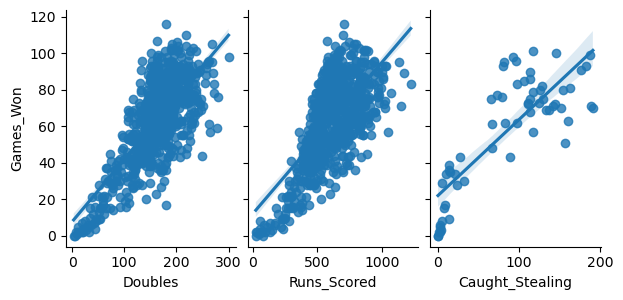

In [2390]:
sns.pairplot(new_dataset, x_vars=['Doubles','Runs_Scored','Caught_Stealing'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

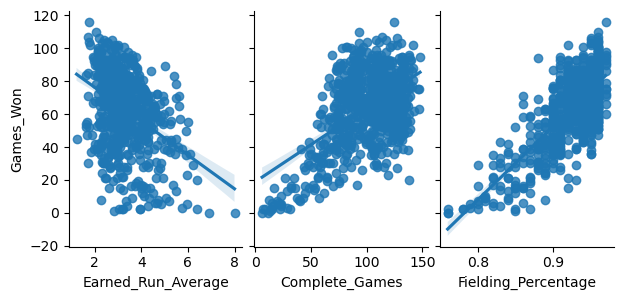

In [2391]:
sns.pairplot(new_dataset, x_vars=['Earned_Run_Average','Complete_Games','Fielding_Percentage'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

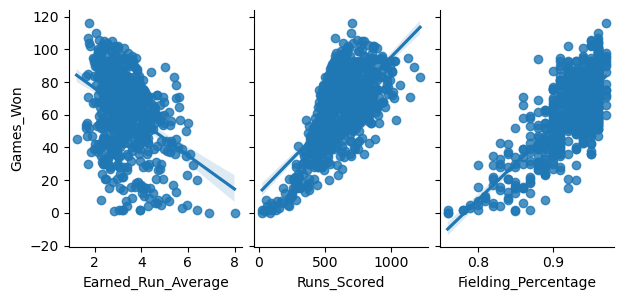

In [2392]:
sns.pairplot(new_dataset, x_vars=['Earned_Run_Average','Runs_Scored', 'Fielding_Percentage'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

In [2393]:
# it seems like a combination of O&D has the highest R2, and they graphs are somewhat Linear 

In [2394]:
#Moving to the next period 

In [2395]:
df_filtered = dataset[(dataset["Year "] >= 1920) & (dataset["Year "] <= 1960)]

In [2396]:
print("Min Year:", df_filtered["Year "].min())  
print("Max Year:", df_filtered["Year "].max())  
print("Filtered data shape:", df_filtered.shape) 

Min Year: 1920
Max Year: 1960
Filtered data shape: (656, 43)


In [2397]:
df_filtered.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   656.000000      656.000000    656.000000  656.000000  656.000000  656.000000   656.000000   656.000000   656.000000  656.000000  656.000000  656.000000  656.000000   656.000000    656.000000       456.000000           0.0            0.0    656.000000   656.000000          656.000000      656.000000  656.000000  656.000000        656.000000    656.000000        656.000000     656.000000          656.000000  656.000000    656.000000           656.000000  6.560000e+02
mean   1940.000000        4.478659    154.329268   77.164634   76.676829   76.676829   712.375000  5312.492378  1436.890244  241.966463   57.582317   90.368902  516.504573   549.696646     62.920732        49.089912           NaN            NaN    712.375000   612.205793            4.006890       65.128049    9.564024   15.721037       4130.153963   1436.623476         90.368902     516.233232          549.623476  168.966463    150.536585             0.967774  7.525824e+05
std      11.841188        2.284933      1.481117    1.453724   14.289669   14.165084   106.405187   108.493289   107.894804   37.978364   18.738113   42.176777   93.125754   124.180960     29.325025        23.027805           NaN            NaN    104.673726    90.215664            0.618042       15.450252    4.311765    7.294037         62.425937    112.989995         34.254698      89.274423          129.580262   33.330482     19.887743             0.005736  4.347113e+05
min    1920.000000        1.000000    147.000000   70.000000   38.000000   43.000000   394.000000  4898.000000  1174.000000  153.000000   19.000000   16.000000  283.000000   308.000000     13.000000         8.000000           NaN            NaN    475.000000   399.000000            2.550000       26.000000    1.000000    2.000000       3891.000000   1163.000000         25.000000     257.000000          310.000000   99.000000     94.000000             0.950000  8.092200e+04
25%    1930.000000        2.000000    154.000000   77.000000   66.000000   66.000000   642.750000  5234.000000  1358.000000  215.000000   44.000000   56.000000  449.000000   462.750000     42.000000        33.750000           NaN            NaN    637.000000   547.750000            3.577500       54.000000    6.000000   10.000000       4089.000000   1360.750000         65.000000     452.750000          448.000000  145.000000    137.750000             0.960000  4.269720e+05
50%    1940.000000        4.000000    154.000000   77.000000   78.000000   76.000000   705.000000  5301.000000  1426.000000  239.000000   55.000000   86.000000  506.000000   534.500000     58.000000        44.000000           NaN            NaN    704.500000   603.000000            3.950000       66.500000    9.000000   15.000000       4131.000000   1429.000000         84.000000     513.000000          534.500000  167.500000    150.000000             0.970000  6.643340e+05
75%    1950.000000        6.000000    155.000000   78.000000   87.000000   87.000000   772.500000  5379.000000  1509.250000  265.000000   69.000000  117.250000  580.000000   616.250000     78.000000        61.000000           NaN            NaN    774.250000   668.250000            4.390000       76.000000   12.000000   20.000000       4173.000000   1507.250000        113.000000     577.250000          636.250000  190.000000    164.000000             0.970000  9.808032e+05
max    1960.000000        8.000000    158.000000   82.000000  111.000000  115.000000  1067.000000  5667.000000  1783.000000  373.000000  122.000000  221.000000  835.000000  1054.000000    1

In [2398]:
df_numeric = df_filtered.select_dtypes(include=[float, int])

In [2399]:
#Spliting Data into train and test sets

In [2400]:
X = df_filtered.drop("Games_Won", axis=1)  # All columns except 'Games_Won'
y = df_filtered["Games_Won"]  # The target variable 'Games_Won'

In [2401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [2402]:
x_train.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   503.000000      503.000000    503.000000  227.000000  503.000000  503.000000   503.000000   503.000000   503.000000  503.000000  503.000000  503.000000  503.000000   426.000000    396.000000        45.000000           0.0            0.0    503.000000   503.000000          503.000000      503.000000  503.000000  503.000000        503.000000    503.000000        503.000000     503.000000          503.000000  503.000000    286.000000           503.000000  3.030000e+02
mean   1897.803181        4.840954    128.051690   74.955947   63.288270   62.568588   612.614314  4381.371769  1136.922465  162.137177   65.236581   23.970179  336.425447   399.758216    199.603535        92.822222           NaN            NaN    610.286282   404.584493            3.248052       98.252485    9.216700    4.039761       3397.013917   1135.936382         24.013917     336.483101          427.554672  337.662028     93.923077             0.923956  3.209223e+05
std      14.083807        2.724127     34.694014    5.360276   23.000658   22.040319   182.085315  1070.349084   298.186504   49.699085   24.041914   16.531182  158.481181   181.433106     86.855252        61.185741           NaN            NaN    184.591348   146.839236            0.899212       27.300414    6.405827    4.632555        925.264074    295.720351         14.444902     160.998067          188.517049  111.241854     26.192694             0.038473  1.717898e+05
min    1871.000000        1.000000      6.000000   52.000000    0.000000    4.000000    24.000000   211.000000    33.000000    5.000000    0.000000    0.000000    0.000000     0.000000      0.000000         0.000000           NaN            NaN     34.000000    25.000000            1.610000        6.000000    0.000000    0.000000        162.000000     49.000000          0.000000       0.000000            0.000000   47.000000     18.000000             0.760000  1.606400e+04
25%    1885.500000        3.000000    114.000000   73.000000   50.000000   48.000000   500.000000  4086.000000  1019.000000  139.000000   50.000000   13.000000  236.000000   293.250000    150.000000        21.000000           NaN            NaN    484.000000   325.000000            2.620000       81.000000    4.000000    0.000000       3039.000000   1003.500000         13.000000     234.000000          307.500000  252.000000     81.000000             0.900000  1.897345e+05
50%    1898.000000        5.000000    139.000000   77.000000   68.000000   64.000000   620.000000  4802.000000  1228.000000  167.000000   68.000000   21.000000  376.000000   414.500000    192.000000       106.000000           NaN            NaN    600.000000   418.000000            3.060000      103.000000    8.000000    2.000000       3657.000000   1228.000000         22.000000     378.000000          465.000000  319.000000     97.000000             0.940000  2.930190e+05
75%    1911.000000        7.000000    154.000000   78.000000   79.500000   78.000000   733.500000  5074.500000  1331.000000  194.000000   83.000000   33.000000  448.500000   540.750000    235.250000       137.000000           NaN            NaN    737.000000   500.000000            3.725000      118.000000   13.000000    7.000000       4104.000000   1327.500000         33.000000     447.000000          558.500000  419.000000    113.000000             0.950000  4.203690e+05
max    1921.000000       13.000000    160.000000   84.000000  107.000000  117.000000  1143.000000  5469.000000  1732.000000  300.000000  131.000000  142.000000  681.000000   863.000000    5

In [2403]:
x_test.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage     Attendance
count   216.000000      216.000000    216.000000   95.000000  216.000000  216.000000   216.000000   216.000000   216.000000  216.000000  216.000000  216.000000  216.000000   173.000000    179.000000        17.000000           0.0            0.0    216.000000   216.000000          216.000000      216.000000  216.000000  216.000000         216.00000    216.000000        216.000000     216.000000          216.000000  216.000000    118.000000           216.000000     139.000000
mean   1898.069444        5.069444    130.217593   76.052632   63.083333   64.861111   620.574074  4456.986111  1158.500000  164.861111   66.171296   23.907407  349.884259   380.763006    196.262570        68.058824           NaN            NaN    626.925926   416.875000            3.308796       99.245370    9.444444    3.972222        3458.87500   1160.055556         23.935185     355.777778          421.384259  330.222222     93.889831             0.926019  305459.273381
std      13.620087        2.678040     35.065439    3.459087   23.203298   22.924936   202.396512  1082.826798   301.660952   51.500365   26.915774   15.848432  157.348230   181.861935     86.411826        55.485889           NaN            NaN    184.463985   145.721998            0.935104       28.212812    7.131761    4.281835         935.40546    290.341221         14.730619     159.955217          190.939259  100.900396     26.301274             0.039812  169199.536398
min    1871.000000        1.000000     11.000000   64.000000    0.000000    8.000000    60.000000   460.000000   105.000000    3.000000    1.000000    0.000000    1.000000     0.000000      0.000000         0.000000           NaN            NaN    161.000000    64.000000            1.220000       11.000000    0.000000    0.000000         297.00000    194.000000          0.000000       3.000000            0.000000  100.000000     33.000000             0.760000    6088.000000
25%    1888.000000        3.000000    129.000000   75.000000   50.750000   52.750000   513.500000  4509.500000  1087.250000  140.750000   50.750000   13.750000  289.000000   269.000000    137.500000        14.000000           NaN            NaN    512.500000   353.500000            2.690000       81.000000    4.000000    0.750000        3348.00000   1097.500000         13.000000     298.500000          305.500000  251.750000     78.250000             0.910000  189092.000000
50%    1898.000000        5.000000    140.500000   77.000000   64.000000   65.000000   612.500000  4878.000000  1242.000000  173.000000   66.000000   21.000000  376.500000   391.000000    181.000000        66.000000           NaN            NaN    622.500000   433.500000            3.125000      105.000000    8.000000    2.000000        3711.00000   1245.500000         22.500000     393.000000          460.500000  309.500000     96.000000             0.940000  273046.000000
75%    1909.000000        7.000000    155.000000   78.000000   80.250000   81.250000   756.750000  5087.250000  1332.250000  199.250000   84.000000   31.250000  466.750000   516.000000    246.500000       114.000000           NaN            NaN    731.000000   507.500000            3.785000      121.000000   14.000000    6.000000        4113.75000   1325.750000         33.000000     464.500000          557.250000  398.000000    108.750000             0.950000  381334.000000
max    1921.000000       12.000000    162.000000   82.000000  116.000000  134.000000  1220.000000  5495.000000  1658.000000  277.000000  150.000000  103.000000  655.000000   769.000

In [2404]:
#Compute and visualize correlation matrix

In [2405]:
#We'll need to decide on which variables we are going to build our models, we will choose 2 offensive and 2 defensive variables,and the a mixture of both. 

In [2406]:
df_filtered.corr(method ='pearson',numeric_only=True )

Year   Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost  Runs_Scored   At_Bats      Hits   Doubles   Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games   Shutout     Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed    Errors  Double_Plays  Fielding_Percentage  Attendance
Year                 1.000000       -0.000846      0.189423    0.096496   0.010692    0.010786    -0.266526 -0.225335 -0.593521 -0.475833 -0.654101   0.574305  0.372835     0.775004     -0.507720        -0.714296           NaN            NaN     -0.270935    -0.110476           -0.122267       -0.630517  0.194965  0.568528          0.165195     -0.563868          0.707125       0.391619            0.743800 -0.705631      0.323348             0.562170    0.499634
Final_Standing      -0.000846        1.000000     -0.098972   -0.189685  -0.943757    0.942197    -0.603756 -0.232830 -0.399660 -0.257100 -0.232379  -0.318946 -0.331849     0.072526     -0.151704        -0.005618           NaN            NaN      0.587983     0.571298            0.581760       -0.313545 -0.508142 -0.372043         -0.363982      0.461592          0.115829       0.226013           -0.284405  0.316408     -0.062809            -0.303000   -0.501730
Games_Played         0.189423       -0.098972      1.000000    0.578910   0.124491   -0.062669     0.051285  0.385212  0.025391 -0.005340 -0.020012   0.125701  0.169928     0.179050     -0.023230        -0.096286           NaN            NaN     -0.047741    -0.026490           -0.090560       -0.044410  0.125789  0.122419          0.679439     -0.038285          0.121942       0.115308            0.225959 -0.114018      0.108227             0.151084    0.224956
Unnamed: 7           0.096496       -0.189685      0.578910    1.000000   0.208423   -0.173571     0.102494  0.255327  0.078997  0.063840  0.077799   0.070123  0.117065     0.040871      0.022546        -0.051927           NaN            NaN     -0.137380    -0.126344           -0.164631        0.056226  0.198529  0.067690          0.444714     -0.101251          0.021466       0.006668            0.165698 -0.132760      0.121775             0.153864    0.203296
Games_Won            0.010692       -0.943757      0.124491    0.208423   1.000000   -0.996320     0.630446  0.238560  0.406878  0.258201  0.249142   0.337838  0.355075    -0.059774      0.166497         0.019065           NaN            NaN     -0.632867    -0.611269           -0.624095        0.343912  0.533875  0.397917          0.398372     -0.494073         -0.119464      -0.243707            0.315247 -0.342777      0.065158             0.322760    0.528659
Games_Lost           0.010786        0.942197     -0.062669   -0.173571  -0.996320    1.000000    -0.631864 -0.221396 -0.410626 -0.264570 -0.254123  -0.322238 -0.347270     0.081229     -0.168956        -0.027568           NaN            NaN      0.632763     0.613672            0.622297       -0.356736 -0.529343 -0.385418         -0.356303      0.491071          0.140546       0.251879           -0.292402  0.332390     -0.051248            -0.311575   -0.505501
Runs_Scored         -0.266526       -0.603756      0.051285    0.102494   0.630446   -0.631864     1.000000  0.524349  0.802339  0.647227  0.448048   0.372461  0.438473    -0.186051      0.235950         0.051414           NaN            NaN      0.126334     0.122329            0.111492        0.256190 -0.009247  0.159890          0.038133      0.168199          0.020879       0.012314            0.026334  0.021962      0.039294            -0.037528    0.236765
At_Bats             -0.225335       -0.232830      0.385212    0.255327   0.238560   -0.221396     0.524349  1.000000  0.707583  0.540436  0.304883   0.080270 -0.051371    -0.197843      0.049253        -0.006570           NaN            NaN      0.206288     0.185212            0.136491

In [2407]:
# Select the offensive variables

In [2408]:
lmo = smf.ols(formula="Games_Won ~ Runs_Scored + Hits + Doubles", data=x_train).fit()
lmo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     307.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          4.56e-113
Time:                        14:35:42   Log-Likelihood:                -2027.0
No. Observations:                 503   AIC:                             4062.
Df Residuals:                     499   BIC:                             4079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.4530      2.425     -3.073      0.002     -12.217      -2.689
Runs_Scored     0.0117      0.006      2.043      0.042       0.000       0.023
Hits            0.0492      0.005     10.078      0.000       0.040       0.059
Doubles         0.0470      0.026      1.832      0.068      -0.003       0.097
==============================================================================
Omnibus:                        6.876   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.737
Skew:                          -0.276   Prob(JB):                       0.0344
Kurtosis:                       3.133   Cond. No.                     5.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2409]:
#Adjusting R2

In [2410]:
lmo = smf.ols(formula="Games_Won ~ Runs_Scored + Hits + Doubles -1 ", data=x_train).fit()
lmo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              3837.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:42   Log-Likelihood:                         -2031.7
No. Observations:                 503   AIC:                                      4069.
Df Residuals:                     500   BIC:                                      4082.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0095      0.006      1.658      0.098      -0.002       0.021
Hits            0.0436      0.005      9.546      0.000       0.035       0.053
Doubles         0.0514      0.026      1.990      0.047       0.001       0.102
==============================================================================
Omnibus:                        2.127   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.098
Skew:                          -0.158   Prob(JB):                        0.350
Kurtosis:                       2.978   Cond. No.                         57.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

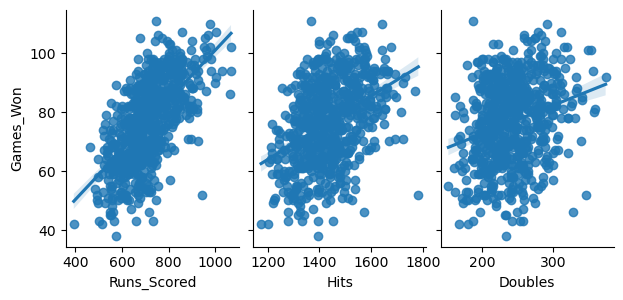

In [2411]:
sns.pairplot(df_filtered, x_vars=['Runs_Scored', 'Hits', 'Doubles'], y_vars='Games_Won', height=3, aspect=0.7, kind='reg')
plt.show()

In [2412]:
# Select the defensive variables

In [2413]:
lmd = smf.ols(formula="Games_Won ~ Saves + Strikeouts_Allowed +  Earned_Run_Average	", data=x_train).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     217.7
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.93e-90
Time:                        14:35:43   Log-Likelihood:                -2080.0
No. Observations:                 503   AIC:                             4168.
Df Residuals:                     499   BIC:                             4185.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             47.0384      3.542     13.279      0.000      40.078      53.998
Saves                  1.1805      0.167      7.074      0.000       0.853       1.508
Strikeouts_Allowed     0.0636      0.004     15.157      0.000       0.055       0.072
Earned_Run_Average    -4.8382      0.802     -6.034      0.000      -6.414      -3.263
==============================================================================
Omnibus:                        2.423   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.332
Skew:                           0.109   Prob(JB):                        0.312
Kurtosis:                       2.748   Cond. No.                     2.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2414]:
#Adjusting R2

In [2415]:
lmd = smf.ols(formula="Games_Won ~ Saves + Strikeouts_Allowed +  Earned_Run_Average -1", data=x_train).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2275.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                   6.22e-291
Time:                        14:35:43   Log-Likelihood:                         -2156.1
No. Observations:                 503   AIC:                                      4318.
Df Residuals:                     500   BIC:                                      4331.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Saves                  1.3156      0.194      6.796      0.000       0.935       1.696
Strikeouts_Allowed     0.0972      0.004     24.975      0.000       0.090       0.105
Earned_Run_Average     4.5259      0.444     10.204      0.000       3.655       5.397
==============================================================================
Omnibus:                        2.317   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.157
Skew:                          -0.087   Prob(JB):                        0.340
Kurtosis:                       2.730   Cond. No.                         264.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

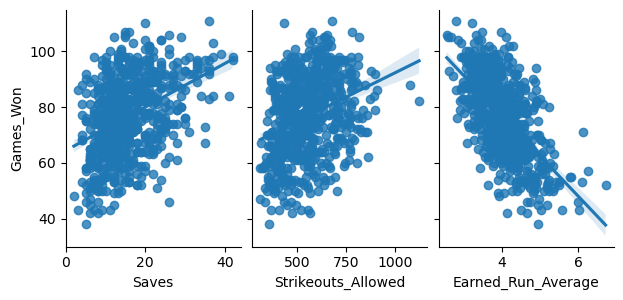

In [2416]:
sns.pairplot(df_filtered, x_vars=['Saves', 'Strikeouts_Allowed' ,'Earned_Run_Average'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

In [2417]:
#Mix model of both offensive and deffensive varaibes

In [2418]:
lmd = smf.ols(formula="Games_Won ~ Saves + Strikeouts_Allowed + Runs_Scored + Hits  -1", data=x_train).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4288.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:44   Log-Likelihood:                         -1934.3
No. Observations:                 503   AIC:                                      3877.
Df Residuals:                     499   BIC:                                      3894.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Saves                  1.2092      0.131      9.240      0.000       0.952       1.466
Strikeouts_Allowed     0.0392      0.004     10.564      0.000       0.032       0.046
Runs_Scored            0.0457      0.005      8.734      0.000       0.035       0.056
Hits                   0.0122      0.004      3.425      0.001       0.005       0.019
==============================================================================
Omnibus:                        2.029   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                2.086
Skew:                          -0.151   Prob(JB):                        0.352
Kurtosis:                       2.910   Cond. No.                         363.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

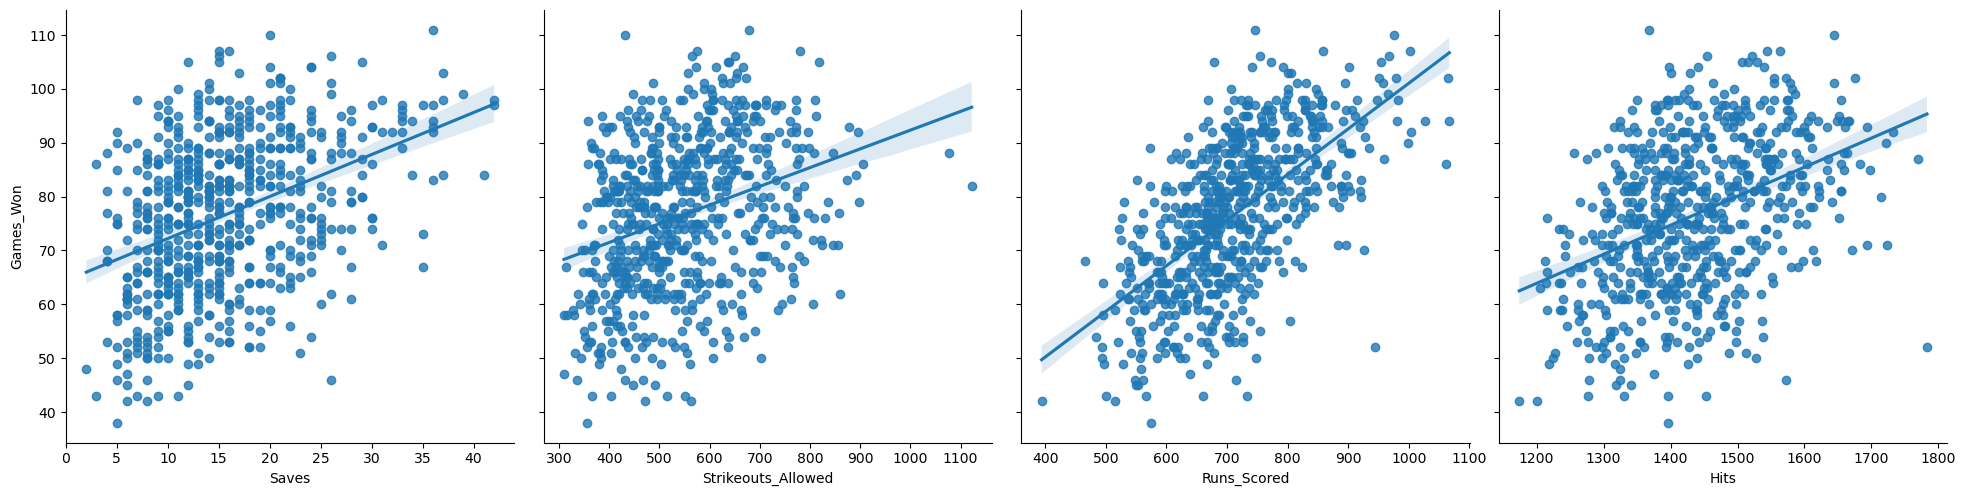

In [2419]:
sns.pairplot(df_filtered, x_vars=['Saves', 'Strikeouts_Allowed' ,'Runs_Scored','Hits'], y_vars='Games_Won', height=5,aspect=1, kind='reg')
plt.show()

In [2420]:
#Moving to period #3 

In [2421]:
period3= dataset[(dataset["Year "] >= 1960) & (dataset["Year "] <= 1990)]

In [2422]:
# describing period 3 (1960 to 1990) dataset
period3.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   730.000000      730.000000    730.000000  730.000000  730.000000  730.000000   730.000000   730.000000   730.000000  730.000000  730.000000  730.000000  730.000000   730.000000    730.000000       730.000000           0.0            0.0    730.000000   730.000000          730.000000      730.000000  730.000000  730.000000        730.000000    730.000000        730.000000     730.000000          730.000000  730.000000    730.000000           730.000000  7.300000e+02
mean   1975.989041        4.036986    159.476712   79.738356   79.639726   79.639726   666.260274  5414.205479  1381.865753  225.293151   36.978082  125.987671  514.838356   860.519178     99.320548        52.275342           NaN            NaN    666.260274   590.786301            3.719973       34.068493   11.086301   33.163014       4288.786301   1381.920548        125.987671     514.838356          860.519178  135.554795    148.928767             0.973247  1.461671e+06
std       8.717162        2.216660     10.242740    5.187966   12.609262   12.533973    92.332528   359.801003   124.401144   33.976536   10.838992   35.105698   73.618664   125.166535     46.949013        17.469694           NaN            NaN     92.038614    83.651612            0.475285       14.207968    4.538142    9.477111        276.553893    123.416374         28.639974      75.617739          131.746380   21.945259     20.227116             0.004830  6.434050e+05
min    1960.000000        1.000000    103.000000   47.000000   37.000000   42.000000   329.000000  3493.000000   797.000000  119.000000   11.000000   32.000000  275.000000   379.000000     16.000000        11.000000           NaN            NaN    331.000000   293.000000            2.450000        6.000000    1.000000   10.000000       2767.000000    827.000000         40.000000     268.000000          388.000000   65.000000     74.000000             0.960000  3.067630e+05
25%    1969.000000        2.000000    161.000000   81.000000   72.000000   71.250000   614.000000  5415.000000  1329.250000  203.000000   29.000000  101.000000  471.000000   797.250000     64.250000        41.000000           NaN            NaN    611.000000   537.000000            3.380000       23.000000    8.000000   26.000000       4302.000000   1330.500000        106.000000     470.000000          780.000000  122.000000    136.000000             0.970000  9.552250e+05
50%    1976.000000        4.000000    162.000000   81.000000   81.000000   79.000000   675.000000  5489.000000  1397.000000  225.000000   36.000000  124.000000  514.000000   869.000000     93.000000        51.000000           NaN            NaN    671.000000   595.000000            3.710000       34.000000   11.000000   33.000000       4344.000000   1399.000000        126.000000     511.000000          868.000000  135.500000    149.500000             0.970000  1.324782e+06
75%    1983.000000        6.000000    162.000000   81.000000   89.000000   88.000000   729.000000  5544.750000  1457.750000  249.750000   44.000000  148.000000  563.000000   940.000000    129.750000        62.000000           NaN            NaN    726.000000   648.000000            4.040000       44.000000   14.000000   40.000000       4383.000000   1456.000000        144.000000     564.000000          939.750000  149.000000    162.000000             0.980000  1.865531e+06
max    1990.000000       10.000000    165.000000   84.000000  109.000000  120.000000   896.000000  5767.000000  1633.000000  326.000000   79.000000  240.000000  729.000000  1203.000000    3

In [2423]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(period3, period3['Games_Won'],test_size=0.3, random_state=0)

In [2424]:
# Setting Year as index of dataset

x_train3.set_index('Year ')

League Team  Franchise  Division  Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost Unnamed: 10 Unnamed: 11 League_Win World_Series  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games  Shutout  Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage            Team_Name      Home_Ball_Park  Attendance
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1971      AL   ML4        MIL        W               6           161        82.0         69          92       False         NaN      False        False          534     5185  1188      160       23        104    543        924.0          82.0             53.0           NaN            NaN           609          532                3.38              32       23     32              4248          1303               130            569                 795     138         152.0                 0.97    Milwaukee Brewers      County Stadium    731531.0
1983      AL   BOS        BOS        E               6           162        81.0         78          84       False         NaN      False        False          724     5590  1512      287       32        142    536        758.0          30.0             26.0           NaN            NaN           775          697                4.34              29        7     42              4338          1572               158            493                 767     130         168.0                 0.97       Boston Red Sox      Fenway Park II   1782285.0
1960      NL   PIT        PIT      NaN               1           155        78.0         95          59         NaN         NaN       True         True          734     5406  1493      236       56        120    486        747.0          34.0             24.0           NaN            NaN           593          543                3.49              47       11     33              4197          1363               105            386                 811     128         163.0                 0.97   Pittsburgh Pirates        Forbes Field   1705828.0
1968      AL   CLE        CLE      NaN               3           162        81.0         86          75         NaN         NaN      False        False          516     5416  1266      210       36         75    427        858.0         115.0             61.0           NaN            NaN           504          433                2.66              48       23     32              4392          1087                98            540                1157     126         130.0                 0.97    Cleveland Indians   Cleveland Stadium    857994.0
1984      AL   DET        DET        E               1           162        82.0        104          58        True         NaN       True         True          829     5644  1529      254       46        187    602        941.0         106.0             68.0           NaN            NaN           643          568                3.49              19        8     51              4392          1358               130            489                 914     124         162.0                 0.98       Detroit Tigers       Tiger Stadium   2704794.0
...      ...   ...        ...      ...             ...           ...         ...        ...         ...         ...         ...        ...          ...          ..

In [2425]:
# Statistics of Train dataset

x_train3.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   511.000000      511.000000    511.000000  511.000000  511.000000  511.000000   511.000000   511.000000   511.000000  511.000000  511.000000  511.000000  511.000000   511.000000    511.000000       511.000000           0.0            0.0    511.000000   511.000000          511.000000      511.000000  511.000000  511.000000        511.000000    511.000000        511.000000     511.000000          511.000000  511.000000    511.000000           511.000000  5.110000e+02
mean   1975.904110        4.054795    159.802348   79.902153   79.978474   79.637965   668.197652  5425.397260  1385.309198  225.272016   36.919765  125.982387  515.636008   862.168297     99.710372        52.307241           NaN            NaN    667.221135   591.772994            3.718669       33.958904   11.203523   33.571429       4297.667319   1385.874755        126.759295     511.919765          863.792564  136.078278    149.031311             0.973209  1.490630e+06
std       8.844883        2.233640      9.599125    4.874324   12.300547   12.193539    91.572911   337.304158   119.112676   34.188554   11.183120   34.220646   73.784640   122.489964     48.437166        17.792307           NaN            NaN     87.987120    80.698321            0.463291       14.219025    4.409623    9.099789        260.656695    116.707595         28.211366      74.486500          128.969840   21.800471     20.367000             0.004756  6.567833e+05
min    1960.000000        1.000000    103.000000   47.000000   41.000000   46.000000   348.000000  3493.000000   868.000000  133.000000   11.000000   32.000000  295.000000   379.000000     16.000000        11.000000           NaN            NaN    331.000000   293.000000            2.450000        6.000000    1.000000   12.000000       2767.000000    840.000000         40.000000     268.000000          404.000000   65.000000     81.000000             0.960000  3.067630e+05
25%    1968.000000        2.000000    161.500000   81.000000   72.000000   72.000000   616.000000  5419.000000  1328.500000  203.000000   29.000000  102.000000  469.500000   801.000000     64.000000        39.500000           NaN            NaN    612.000000   539.000000            3.370000       23.000000    8.000000   27.000000       4306.500000   1337.500000        108.000000     468.000000          784.000000  122.000000    136.000000             0.970000  9.783885e+05
50%    1977.000000        4.000000    162.000000   81.000000   81.000000   80.000000   673.000000  5489.000000  1397.000000  224.000000   35.000000  125.000000  513.000000   870.000000     91.000000        51.000000           NaN            NaN    671.000000   595.000000            3.710000       33.000000   11.000000   33.000000       4350.000000   1402.000000        126.000000     507.000000          870.000000  137.000000    150.000000             0.970000  1.373087e+06
75%    1983.500000        6.000000    162.000000   81.000000   89.000000   88.000000   730.000000  5545.000000  1459.000000  248.000000   43.500000  148.000000  563.000000   939.500000    131.000000        62.000000           NaN            NaN    725.000000   646.500000            4.040000       44.000000   14.000000   41.000000       4383.000000   1455.000000        143.000000     560.000000          941.000000  150.000000    162.000000             0.980000  1.904772e+06
max    1990.000000       10.000000    165.000000   84.000000  109.000000  112.000000   896.000000  5767.000000  1633.000000  326.000000   79.000000  240.000000  729.000000  1203.000000    3

In [2426]:
# Statistics of Test Dataset

x_test3.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   219.000000      219.000000    219.000000  219.000000  219.000000  219.000000   219.000000   219.000000   219.000000  219.000000  219.000000  219.000000  219.000000   219.000000    219.000000       219.000000           0.0            0.0    219.000000   219.000000          219.000000      219.000000  219.000000  219.000000        219.000000    219.000000        219.000000     219.000000          219.000000  219.000000    219.000000           219.000000  2.190000e+02
mean   1976.187215        3.995434    158.716895   79.356164   78.849315   79.643836   661.739726  5388.091324  1373.831050  225.342466   37.114155  126.000000  512.977169   856.671233     98.410959        52.200913           NaN            NaN    664.018265   588.484018            3.723014       34.324201   10.812785   32.210046       4268.063927   1372.694064        124.187215     521.648402          852.881279  134.333333    148.689498             0.973333  1.394099e+06
std       8.428143        2.181023     11.594931    5.849104   13.297242   13.323467    94.137616   407.137232   135.892476   33.554236   10.013327   37.169954   73.364582   131.407873     43.371079        16.732263           NaN            NaN    101.040003    90.319380            0.503243       14.211376    4.824120   10.262682        310.154572    137.651776         29.603444      77.942049          138.009089   22.281834     19.941070             0.005008  6.071437e+05
min    1960.000000        1.000000    103.000000   49.000000   37.000000   42.000000   329.000000  3521.000000   797.000000  119.000000   16.000000   47.000000  275.000000   434.000000     18.000000        11.000000           NaN            NaN    343.000000   305.000000            2.490000        6.000000    2.000000   10.000000       2826.000000    827.000000         52.000000     287.000000          388.000000   72.000000     74.000000             0.960000  4.690900e+05
25%    1970.000000        2.000000    161.000000   80.000000   70.000000   71.000000   608.000000  5398.500000  1333.500000  203.000000   29.500000   99.000000  473.500000   792.500000     66.000000        42.500000           NaN            NaN    610.000000   533.500000            3.400000       24.000000    7.000000   25.000000       4294.500000   1318.000000        101.000000     476.500000          773.500000  121.000000    137.000000             0.970000  9.281100e+05
50%    1976.000000        4.000000    162.000000   81.000000   81.000000   79.000000   676.000000  5489.000000  1397.000000  225.000000   36.000000  124.000000  516.000000   864.000000     95.000000        52.000000           NaN            NaN    669.000000   593.000000            3.720000       35.000000   10.000000   31.000000       4338.000000   1396.000000        125.000000     519.000000          863.000000  133.000000    149.000000             0.970000  1.213357e+06
75%    1983.000000        6.000000    162.000000   81.000000   87.500000   87.000000   723.500000  5540.500000  1451.000000  251.000000   44.000000  149.500000  562.500000   945.500000    125.500000        62.000000           NaN            NaN    727.000000   653.000000            4.060000       44.000000   14.000000   39.000000       4378.500000   1459.000000        146.500000     572.000000          935.000000  146.500000    162.000000             0.980000  1.795100e+06
max    1990.000000       10.000000    164.000000   84.000000  109.000000  120.000000   891.000000  5733.000000  1620.000000  298.000000   68.000000  221.000000  684.000000  1154.000000    2

In [2427]:
period3.corr(method ='pearson',numeric_only=True )

Year   Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost  Runs_Scored   At_Bats      Hits   Doubles   Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games   Shutout     Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed    Errors  Double_Plays  Fielding_Percentage  Attendance
Year                 1.000000       -0.215150     -0.064221   -0.063397  -0.022225   -0.022359     0.127479 -0.032791  0.130501  0.421261 -0.151876  -0.032691  0.021892    -0.118681      0.491753         0.418678           NaN            NaN      0.127886     0.172348            0.224054       -0.531853 -0.221343  0.321465         -0.077533      0.131798         -0.040072       0.021313           -0.112753 -0.263833     -0.055544             0.227936    0.483901
Final_Standing      -0.215150        1.000000      0.019039    0.021956  -0.759686    0.776072    -0.438587 -0.031928 -0.274490 -0.273384 -0.092971  -0.216163 -0.219694     0.172375     -0.267608        -0.115708           NaN            NaN      0.412165     0.382720            0.440697       -0.146601 -0.329770 -0.401215         -0.033483      0.230332          0.222843       0.268166           -0.052045  0.305818      0.023341            -0.263642   -0.483715
Games_Played        -0.064221        0.019039      1.000000    0.986699   0.412684    0.404104     0.513379  0.973249  0.723187  0.423987  0.211822   0.319747  0.457620     0.552915      0.119605         0.136212           NaN            NaN      0.508146     0.488141            0.060063        0.172110  0.129196  0.221497          0.987896      0.722502          0.388043       0.444293            0.527133  0.415014      0.434891            -0.048797    0.159182
Unnamed: 7          -0.063397        0.021956      0.986699    1.000000   0.402574    0.403094     0.503816  0.959495  0.709846  0.414902  0.210932   0.312950  0.450713     0.549158      0.117087         0.131338           NaN            NaN      0.508623     0.489123            0.069397        0.170617  0.127334  0.213883          0.974956      0.718502          0.388652       0.445246            0.521741  0.409084      0.429367            -0.049813    0.155802
Games_Won           -0.022225       -0.759686      0.412684    0.402574   1.000000   -0.665723     0.672123  0.455421  0.573141  0.407826  0.226863   0.429573  0.397121     0.134474      0.196922         0.038369           NaN            NaN     -0.249366    -0.227279           -0.476491        0.299950  0.451290  0.502047          0.464001      0.032424         -0.011753      -0.164312            0.347724 -0.148223      0.158119             0.250331    0.483733
Games_Lost          -0.022359        0.776072      0.404104    0.403094  -0.665723    1.000000    -0.253619  0.339295  0.017468 -0.058076 -0.057490  -0.169524 -0.022344     0.316947     -0.096776         0.077603           NaN            NaN      0.667961     0.629881            0.529815       -0.163693 -0.349280 -0.319674          0.342487      0.560377          0.329586       0.531170            0.081021  0.485433      0.198085            -0.287916   -0.352730
Runs_Scored          0.127479       -0.438587      0.513379    0.503816   0.672123   -0.253619     1.000000  0.619035  0.845862  0.694609  0.280874   0.703117  0.566696     0.145921      0.174073         0.044879           NaN            NaN      0.421630     0.444967            0.240734        0.098488 -0.073375  0.378181          0.512705      0.523484          0.484276       0.201727            0.221284  0.041086      0.339798             0.099210    0.399197
At_Bats             -0.032791       -0.031928      0.973249    0.959495   0.455421    0.339295     0.619035  1.000000  0.835225  0.523000  0.270323   0.380455  0.429349     0.500950      0.117651         0.104901           NaN            NaN      0.538682     0.524549            0.106514

In [2428]:
# For Offensive Variables, we chose At_bats, Hits and Run_Scored, because of there independent nature and strong correlation with
# Output variable (Games Won)

In [2429]:
lmo3 = smf.ols(formula="Games_Won ~  Runs_Scored + Hits + At_Bats", data=x_train3).fit()
lmo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           5.88e-67
Time:                        14:35:46   Log-Likelihood:                -1850.8
No. Observations:                 511   AIC:                             3710.
Df Residuals:                     507   BIC:                             3727.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9076      6.579      1.202      0.230      -5.019      20.834
Runs_Scored     0.0886      0.008     10.461      0.000       0.072       0.105
Hits           -0.0063      0.009     -0.704      0.482      -0.024       0.011
At_Bats         0.0040      0.002      1.877      0.061      -0.000       0.008
==============================================================================
Omnibus:                        7.118   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.536
Skew:                          -0.151   Prob(JB):                       0.0628
Kurtosis:                       2.590   Cond. No.                     9.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2430]:
# Adjusting R Square value
lmo3_1 = smf.ols(formula="Games_Won ~ Runs_Scored + Hits + At_Bats -1 ", data=x_train3).fit()
lmo3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.332e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:46   Log-Likelihood:                         -1851.5
No. Observations:                 511   AIC:                                      3709.
Df Residuals:                     508   BIC:                                      3722.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0877      0.008     10.391      0.000       0.071       0.104
Hits           -0.0066      0.009     -0.735      0.463      -0.024       0.011
At_Bats         0.0056      0.002      3.450      0.001       0.002       0.009
==============================================================================
Omnibus:                        7.530   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.919
Skew:                          -0.165   Prob(JB):                       0.0518
Kurtosis:                       2.588   Cond. No.                         164.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2431]:
# For Defensive Variables, we chose Infield_Put_Outs, Shutout, and Saves because of there independent nature and strong correlation with
# Output variable (Games Won)
lmd3 = smf.ols(formula="Games_Won ~ Infield_Put_Outs + Shutout + Saves", data= x_train3).fit()
lmd3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     159.4
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           9.41e-73
Time:                        14:35:46   Log-Likelihood:                -1837.3
No. Observations:                 511   AIC:                             3683.
Df Residuals:                     507   BIC:                             3700.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.8985      6.480     -0.910      0.363     -18.630       6.833
Infield_Put_Outs     0.0129      0.002      8.122      0.000       0.010       0.016
Shutout              1.0409      0.091     11.494      0.000       0.863       1.219
Saves                0.5646      0.045     12.674      0.000       0.477       0.652
==============================================================================
Omnibus:                        5.387   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.214
Skew:                           0.208   Prob(JB):                       0.0738
Kurtosis:                       2.732   Cond. No.                     7.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2432]:
# Adjusting R Value
lmd3_1 = smf.ols(formula="Games_Won ~ Infield_Put_Outs + Shutout + Saves - 1", data= x_train3).fit()
lmd3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.407e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:46   Log-Likelihood:                         -1837.7
No. Observations:                 511   AIC:                                      3681.
Df Residuals:                     508   BIC:                                      3694.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Infield_Put_Outs     0.0115      0.000     26.190      0.000       0.011       0.012
Shutout              1.0437      0.090     11.534      0.000       0.866       1.222
Saves                0.5658      0.045     12.710      0.000       0.478       0.653
==============================================================================
Omnibus:                        5.527   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.422
Skew:                           0.218   Prob(JB):                       0.0665
Kurtosis:                       2.746   Cond. No.                         996.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2433]:
# Combination of Defensive and Offensive Variablesw
lmdo3 = smf.ols(formula="Games_Won ~ Saves + Shutout + Runs_Scored -1", data=x_train3).fit()
lmdo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.800e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:46   Log-Likelihood:                         -1663.5
No. Observations:                 511   AIC:                                      3333.
Df Residuals:                     508   BIC:                                      3346.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Saves           0.3334      0.033     10.095      0.000       0.269       0.398
Shutout         1.3118      0.059     22.420      0.000       1.197       1.427
Runs_Scored     0.0810      0.002     43.053      0.000       0.077       0.085
==============================================================================
Omnibus:                        1.320   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.387
Skew:                          -0.084   Prob(JB):                        0.500
Kurtosis:                       2.808   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2434]:
# From the above three models, we will now check our R2 value, which is more than 0.9 for the three of them,
# we will also check the P>t value, which is zero for most variables so that's another indicator that our models are correct,
# this means that they're on a linear relationship. Normal discribution is measured by the value of Skew ( +ve or -ve )
# a combination of Defensive + offensive variables seem to work better due to lower AIC BIC, it's also normally distibuted due to the low values of DW/JB/Omnibus

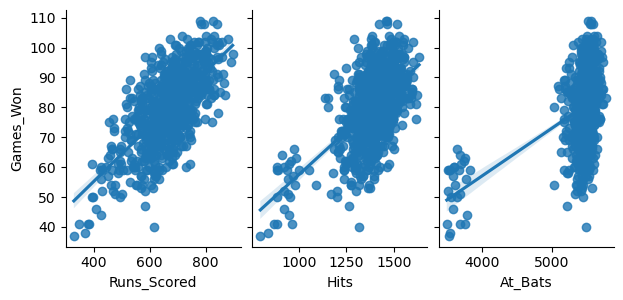

In [2435]:
sns.pairplot(period3, x_vars=['Runs_Scored', 'Hits', 'At_Bats'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

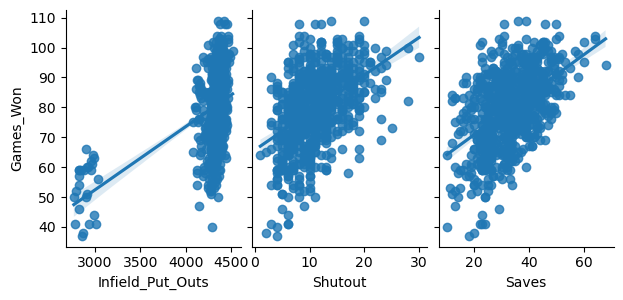

In [2436]:
sns.pairplot(period3, x_vars=['Infield_Put_Outs','Shutout', 'Saves'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

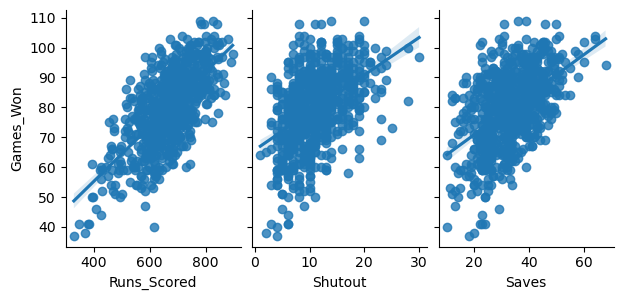

In [2437]:
sns.pairplot(period3, x_vars=['Runs_Scored','Shutout', 'Saves'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

In [2438]:
# It seems like best results are when we consider set of both Offensive and Defensive Variables
# Runs_Scored, Shutout and Saves
# Highest R-Squared Value, F stats and low P|t| , and the graphs tend to be somewhat linear

In [2439]:
#Moving to Period #4

In [2440]:
new_dataset4 = dataset[(dataset["Year "] >= 1990) & (dataset["Year "] <= 2010)]

In [2441]:
new_dataset4.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   608.000000      608.000000    608.000000  608.000000  608.000000  608.000000   608.000000   608.000000   608.000000  608.000000  608.000000  608.000000  608.000000   608.000000    608.000000       608.000000    330.000000     330.000000    608.000000   608.000000          608.000000      608.000000  608.000000  608.000000        608.000000    608.000000        608.000000     608.000000          608.000000  608.000000    608.000000           608.000000  6.080000e+02
mean   2000.259868        3.120066    158.930921   79.442434   79.445724   79.445724   747.483553  5446.587171  1441.445724  280.891447   30.838816  161.365132  536.782895  1017.419408    102.462171        44.868421     57.842424      46.121212    747.483553   683.726974            4.344375        8.409539    8.276316   40.047697       4254.504934   1441.442434        161.365132     536.781250         1017.412829  108.421053    148.613487             0.980138  2.319641e+06
std       5.994086        1.562659     10.517507    5.369691   12.282923   12.259697    93.733980   363.314246   117.725690   35.682677    8.829355   37.691082   78.410122   136.028295     35.511353        15.308765     13.276325       8.427259     97.579063    92.153091            0.547203        5.501688    3.856909    7.784962        283.179215    124.154087         30.538358      73.369502          135.513189   18.933518     20.410780             0.004776  7.440945e+05
min    1990.000000        1.000000    112.000000   44.000000   43.000000   40.000000   466.000000  3856.000000   963.000000  159.000000   11.000000   68.000000  319.000000   568.000000     25.000000        12.000000     29.000000      25.000000    448.000000   407.000000            3.060000        0.000000    0.000000   20.000000       2952.000000    929.000000         76.000000     288.000000          560.000000   57.000000     82.000000             0.970000  6.427450e+05
25%    1995.000000        2.000000    162.000000   81.000000   71.000000   71.000000   686.000000  5478.750000  1398.000000  262.750000   24.000000  135.000000  486.750000   928.000000     75.750000        34.000000     49.000000      40.000000    680.000000   620.000000            3.950000        5.000000    6.000000   35.000000       4300.000000   1385.000000        141.000000     489.000000          935.500000   95.000000    135.000000             0.980000  1.752571e+06
50%    2000.000000        3.000000    162.000000   81.000000   79.500000   79.000000   747.000000  5533.500000  1452.500000  284.000000   30.000000  160.500000  533.000000  1028.000000     99.000000        44.000000     56.000000      45.000000    745.000000   682.000000            4.310000        7.000000    8.000000   40.000000       4328.000000   1452.000000        162.000000     537.500000         1021.000000  107.000000    149.000000             0.980000  2.284751e+06
75%    2005.000000        4.000000    162.000000   81.000000   88.000000   88.000000   807.000000  5601.000000  1510.250000  304.000000   36.250000  187.000000  589.250000  1105.250000    124.250000        53.000000     66.000000      51.000000    814.000000   748.000000            4.712500       11.000000   11.000000   45.000000       4358.000000   1521.250000        182.000000     582.000000         1106.250000  122.000000    162.000000             0.983000  2.865164e+06
max    2010.000000        7.000000    163.000000   84.000000  116.000000  119.000000  1009.000000  5781.000000  1684.000000  376.000000   61.000000  264.000000  775.000000  1529.000000    2

In [2442]:
# describe() the new, filtered dataset 

In [2443]:
x_train4, x_test4, y_train, y_test = train_test_split(new_dataset4, new_dataset4['Games_Won'],test_size=0.3, random_state=0)

In [2444]:
# select the test and train data set from the orginal data 

In [2445]:
x_train4.set_index('Year ')

League Team  Franchise  Division  Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost Unnamed: 10 Unnamed: 11 League_Win World_Series  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games  Shutout  Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage                      Team_Name                         Home_Ball_Park  Attendance
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1995      NL   ATL        ATL        E               1           144        72.0         90          54        True       False       True         True          645     4814  1202      210       27        168    520        933.0          73.0             43.0           NaN            NaN           540          493                3.44              18       11     34              3873          1184               107            436                1087     100         113.0                0.980                 Atlanta Braves          Atlanta-Fulton County Stadium   2561831.0
2002      AL   TBA        TBD        E               5           161        81.0         55         106       False       False      False        False          673     5604  1418      297       35        133    456       1115.0         102.0             45.0          58.0           36.0           918          846                5.29              12        3     25              4321          1567               215            620                 925     126         168.0                0.979           Tampa Bay Devil Rays                        Tropicana Field   1065742.0
2010      NL   FLO        FLA        E               3           162        81.0         80          82       False       False      False        False          719     5531  1403      294       37        152    514       1375.0          92.0             26.0          55.0           43.0           717          652                4.08               5       17     39              4315          1433               134            549                1168     123         130.0                0.979                Florida Marlins                        Dolphin Stadium   1535226.0
2000      AL   CHA        CHW        C               1           162        81.0         95          67        True       False      False        False          978     5646  1615      325       33        216    591        960.0         119.0             42.0          53.0           61.0           839          751                4.66               5        7     43              4351          1509               195            614                1037     133         190.0                0.978              Chicago White Sox                       Comiskey Park II   1947799.0
1996      NL   SFN        SFG        W               4           162        82.0         68          94       False       False      False        False          752     5533  1400      245       21        153    615       1189.0         113.0             53.0           NaN            NaN           862          756                4.72               9        8     35              4326          1520               194            570                 997     134         165.0                0.970           San Francisco Giants            

In [2446]:
# set the year as index and then find that stats of each test and train 

In [2447]:
x_train4.set_index('Year ')

League Team  Franchise  Division  Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost Unnamed: 10 Unnamed: 11 League_Win World_Series  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games  Shutout  Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage                      Team_Name                         Home_Ball_Park  Attendance
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1995      NL   ATL        ATL        E               1           144        72.0         90          54        True       False       True         True          645     4814  1202      210       27        168    520        933.0          73.0             43.0           NaN            NaN           540          493                3.44              18       11     34              3873          1184               107            436                1087     100         113.0                0.980                 Atlanta Braves          Atlanta-Fulton County Stadium   2561831.0
2002      AL   TBA        TBD        E               5           161        81.0         55         106       False       False      False        False          673     5604  1418      297       35        133    456       1115.0         102.0             45.0          58.0           36.0           918          846                5.29              12        3     25              4321          1567               215            620                 925     126         168.0                0.979           Tampa Bay Devil Rays                        Tropicana Field   1065742.0
2010      NL   FLO        FLA        E               3           162        81.0         80          82       False       False      False        False          719     5531  1403      294       37        152    514       1375.0          92.0             26.0          55.0           43.0           717          652                4.08               5       17     39              4315          1433               134            549                1168     123         130.0                0.979                Florida Marlins                        Dolphin Stadium   1535226.0
2000      AL   CHA        CHW        C               1           162        81.0         95          67        True       False      False        False          978     5646  1615      325       33        216    591        960.0         119.0             42.0          53.0           61.0           839          751                4.66               5        7     43              4351          1509               195            614                1037     133         190.0                0.978              Chicago White Sox                       Comiskey Park II   1947799.0
1996      NL   SFN        SFG        W               4           162        82.0         68          94       False       False      False        False          752     5533  1400      245       21        153    615       1189.0         113.0             53.0           NaN            NaN           862          756                4.72               9        8     35              4326          1520               194            570                 997     134         165.0                0.970           San Francisco Giants            

In [2448]:
x_test4.set_index('Year ')

League Team  Franchise  Division  Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost Unnamed: 10 Unnamed: 11 League_Win World_Series  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games  Shutout  Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage                      Team_Name                    Home_Ball_Park  Attendance
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
2009      AL   TOR        TOR        E               4           162        81.0         75          87       False       False      False        False          798     5696  1516      339       13        209    548       1028.0          73.0             23.0          45.0           49.0           771          720                4.47              10       10     25              4353          1509               181            551                1181      76         168.0                0.988              Toronto Blue Jays                     Rogers Centre   1876129.0
1992      NL   ATL        ATL        W               1           162        81.0         98          64        True         NaN       True        False          682     5480  1391      223       48        138    493        924.0         126.0             60.0           NaN            NaN           569          509                3.14              26       24     41              4380          1321                89            489                 948     109         121.0                0.980                 Atlanta Braves     Atlanta-Fulton County Stadium   3077400.0
2008      AL   LAA        ANA        W               1           162        81.0        100          62        True       False      False        False          765     5540  1486      274       25        159    481        987.0         129.0             48.0          52.0           50.0           697          644                3.99               7       10     66              4354          1455               160            457                1106      91         159.0                0.985  Los Angeles Angels of Anaheim                     Angel Stadium   3336747.0
2002      NL   CIN        CIN        C               3           162        80.0         78          84       False       False      False        False          709     5470  1386      297       21        169    583       1188.0         116.0             52.0          66.0           40.0           774          690                4.27               2        8     42              4361          1502               173            550                 980     120         169.0                0.981                Cincinnati Reds                     Cinergy Field   1855787.0
1992      AL   CAL        ANA        W               5           162        81.0         72          90       False         NaN      False        False          579     5364  1306      202       20         88    416        882.0         160.0            101.0           NaN            NaN           671          617                3.84              26       13     42              4338          1449               130            532                 888     134         172.0                0.970              California Angels                   Anaheim Stadium   20654

In [2449]:
x_train4.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   425.000000      425.000000    425.000000  425.000000  425.000000  425.000000   425.000000   425.000000   425.000000  425.000000  425.000000  425.000000  425.000000   425.000000    425.000000       425.000000    228.000000     228.000000    425.000000   425.000000          425.000000      425.000000  425.000000  425.000000        425.000000    425.000000        425.000000     425.000000          425.000000  425.000000    425.000000           425.000000  4.250000e+02
mean   2000.195294        3.155294    158.428235   79.160000   78.917647   79.468235   745.741176  5428.515294  1436.174118  280.287059   30.442353  160.736471  539.327059  1016.698824    102.014118        44.112941     57.938596      45.793860    748.369412   684.534118            4.363553        8.411765    8.096471   39.825882       4240.644706   1439.538824        161.338824     538.021176         1014.150588  108.112941    148.240000             0.980144  2.353459e+06
std       6.012328        1.580953     11.139770    5.788962   12.319271   12.202673    95.651361   383.307017   121.740978   35.395707    8.773733   37.435431   78.732763   142.202996     35.496542        14.945702     13.543719       8.227843     98.540254    93.230488            0.545533        5.596272    3.813161    7.859485        299.890520    129.108825         31.548600      73.403589          140.400122   18.780546     20.853573             0.004688  7.707523e+05
min    1990.000000        1.000000    112.000000   44.000000   47.000000   43.000000   468.000000  3861.000000   963.000000  159.000000   11.000000   68.000000  319.000000   568.000000     25.000000        12.000000     29.000000      25.000000    448.000000   407.000000            3.130000        0.000000    0.000000   20.000000       2952.000000    929.000000         76.000000     332.000000          560.000000   66.000000     82.000000             0.970000  6.427450e+05
25%    1995.000000        2.000000    162.000000   81.000000   70.000000   71.000000   684.000000  5475.000000  1396.000000  263.000000   24.000000  133.000000  488.000000   923.000000     74.000000        34.000000     49.000000      40.000000    681.000000   622.000000            3.980000        4.000000    5.000000   35.000000       4296.000000   1381.000000        139.000000     489.000000          928.000000   95.000000    135.000000             0.980000  1.779895e+06
50%    2000.000000        3.000000    162.000000   81.000000   79.000000   79.000000   745.000000  5530.000000  1448.000000  283.000000   29.000000  160.000000  536.000000  1027.000000     99.000000        43.000000     56.000000      45.000000    746.000000   680.000000            4.330000        7.000000    8.000000   39.000000       4326.000000   1453.000000        162.000000     539.000000         1016.000000  106.000000    149.000000             0.980000  2.315946e+06
75%    2006.000000        4.000000    162.000000   81.000000   88.000000   89.000000   804.000000  5599.000000  1508.000000  304.000000   36.000000  186.000000  593.000000  1109.000000    124.000000        52.000000     66.250000      51.000000    813.000000   749.000000            4.730000       11.000000   11.000000   45.000000       4358.000000   1522.000000        184.000000     583.000000         1104.000000  120.000000    162.000000             0.983000  2.916346e+06
max    2010.000000        7.000000    163.000000   84.000000  116.000000  111.000000  1009.000000  5756.000000  1665.000000  376.000000   61.000000  257.000000  775.000000  1529.000000    2

In [2450]:
x_test4.describe()

Year   Final_Standing  Games_Played  Unnamed: 7   Games_Won  Games_Lost  Runs_Scored      At_Bats         Hits     Doubles     Triples   Home_Runs       Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  Double_Plays  Fielding_Percentage    Attendance
count   183.000000      183.000000    183.000000  183.000000  183.000000  183.000000   183.000000   183.000000   183.000000  183.000000  183.000000  183.000000  183.000000   183.000000    183.000000       183.000000    102.000000     102.000000    183.000000   183.000000          183.000000      183.000000  183.000000  183.000000        183.000000    183.000000        183.000000     183.000000          183.000000  183.000000    183.000000           183.000000  1.830000e+02
mean   2000.409836        3.038251    160.098361   80.098361   80.672131   79.393443   751.530055  5488.557377  1453.688525  282.295082   31.759563  162.825137  530.874317  1019.092896    103.502732        46.622951     57.627451      46.852941    745.426230   681.852459            4.299836        8.404372    8.693989   40.562842       4286.693989   1445.863388        161.426230     533.901639         1024.989071  109.136612    149.480874             0.980126  2.241102e+06
std       5.965221        1.520433      8.824364    4.180166   12.142996   12.424646    89.245851   308.890954   107.144025   36.399649    8.913325   38.341898   77.547366   120.826218     35.621310        16.025218     12.720858       8.854598     95.544442    89.824769            0.549977        5.290504    3.935513    7.605315        237.572463    112.015295         28.135148      73.410341          123.454044   19.317131     19.371113             0.004986  6.736232e+05
min    1990.000000        1.000000    112.000000   52.000000   43.000000   40.000000   466.000000  3856.000000  1001.000000  185.000000   13.000000   75.000000  349.000000   655.000000     31.000000        13.000000     30.000000      30.000000    454.000000   410.000000            3.060000        1.000000    1.000000   22.000000       2991.000000    970.000000         89.000000     288.000000          650.000000   57.000000     90.000000             0.970000  9.149090e+05
25%    1996.000000        2.000000    162.000000   81.000000   73.500000   70.500000   692.000000  5481.500000  1407.000000  262.000000   26.000000  136.000000  481.000000   946.500000     78.500000        36.000000     50.000000      40.000000    675.500000   618.000000            3.915000        5.000000    6.000000   35.500000       4308.000000   1390.500000        147.500000     489.500000          961.000000   95.500000    135.500000             0.980000  1.742122e+06
50%    2001.000000        3.000000    162.000000   81.000000   81.000000   79.000000   750.000000  5541.000000  1459.000000  285.000000   31.000000  163.000000  528.000000  1032.000000    100.000000        45.000000     56.000000      46.000000    745.000000   683.000000            4.290000        7.000000    8.000000   41.000000       4333.000000   1445.000000        163.000000     536.000000         1029.000000  108.000000    149.000000             0.980000  2.194378e+06
75%    2005.000000        4.000000    162.000000   81.000000   89.000000   87.000000   812.000000  5603.000000  1521.500000  305.000000   37.000000  188.000000  583.000000  1094.000000    125.000000        57.000000     64.000000      52.000000    817.500000   745.000000            4.680000       11.000000   11.000000   45.500000       4356.500000   1513.000000        181.000000     580.500000         1107.500000  124.000000    162.000000             0.983000  2.704280e+06
max    2010.000000        7.000000    163.000000   84.000000  105.000000  119.000000   968.000000  5781.000000  1684.000000  373.000000   60.000000  264.000000  770.000000  1371.000000    2

In [2451]:
#Correlation analysis.We'll need to decide on which variables we are going to build our models, we will choose 3 offensive and 3 defensive variables,
#and the a mixture of both, out Y is going ot be " Games won", so now we will first check the value that is close to either 1 or -1 

In [2452]:
new_dataset4.corr(method ='pearson',numeric_only=True )

Year   Final_Standing  Games_Played  Unnamed: 7  Games_Won  Games_Lost  Runs_Scored   At_Bats      Hits   Doubles   Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  Caught_Stealing  Hit_By_Pitch  Sacrifice_Fly  Runs_Against  Earned_Runs  Earned_Run_Average  Complete_Games   Shutout     Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed    Errors  Double_Plays  Fielding_Percentage  Attendance
Year                 1.000000       -0.102183      0.287844    0.281571   0.123664    0.123898     0.227369  0.306147  0.277135  0.488262 -0.058134   0.323339  0.063179     0.510976     -0.247367        -0.489164     -0.127444      -0.131649      0.218410     0.263521            0.132157       -0.600063  0.085466  0.006442          0.267082      0.262800          0.399072       0.067532            0.512945 -0.309249      0.188359             0.603883    0.204119
Final_Standing      -0.102183        1.000000      0.052529    0.041957  -0.741113    0.788517    -0.431553  0.015545 -0.194709 -0.165722  0.008569  -0.347558 -0.346693     0.067849     -0.067532         0.113533     -0.071447      -0.264089      0.413515     0.383421            0.405788        0.004427 -0.283777 -0.458741          0.005764      0.298186          0.162129       0.311767           -0.266053  0.316957      0.177746            -0.243729   -0.401098
Games_Played         0.287844        0.052529      1.000000    0.979662   0.431287    0.426342     0.456536  0.977186  0.756702  0.521019  0.151030   0.274204  0.401212     0.542786      0.124739         0.109139     -0.019346       0.114591      0.434838     0.432372           -0.079002       -0.047342  0.336133  0.375009          0.991657      0.715717          0.336367       0.426248            0.546128  0.287454      0.476718             0.159657    0.207552
Unnamed: 7           0.281571        0.041957      0.979662    1.000000   0.427578    0.412622     0.451428  0.957495  0.744344  0.511617  0.146789   0.265166  0.399180     0.530953      0.115302         0.101175     -0.012868       0.081298      0.430272     0.428635           -0.070027       -0.051314  0.319275  0.372312          0.972317      0.708665          0.338435       0.409030            0.531467  0.270024      0.465946             0.170231    0.222332
Games_Won            0.123664       -0.741113      0.431287    0.427578   1.000000   -0.632107     0.627615  0.451233  0.548153  0.391859  0.035709   0.422444  0.536093     0.125259      0.159598         0.012692      0.112031       0.327577     -0.298179    -0.274627           -0.554553        0.080280  0.526188  0.702968          0.482071     -0.005547         -0.117280      -0.151105            0.491782 -0.165894      0.052713             0.282799    0.517426
Games_Lost           0.123898        0.788517      0.426342    0.412622  -0.632107    1.000000    -0.237626  0.386741  0.100145  0.054205  0.094372  -0.188888 -0.193270     0.341169     -0.053660         0.081201     -0.114285      -0.324428      0.671785     0.646126            0.487567       -0.121123 -0.237612 -0.383305          0.368332      0.619475          0.405548       0.517503           -0.023376  0.412501      0.356514            -0.145231   -0.340424
Runs_Scored          0.227369       -0.431553      0.456536    0.451428   0.627615   -0.237626     1.000000  0.566294  0.812417  0.666345  0.057284   0.760520  0.651081     0.272377      0.018980        -0.124610      0.197890       0.448835      0.408190     0.428289            0.203573       -0.112656  0.035839  0.273339          0.459865      0.483065          0.456906       0.233159            0.341290 -0.018373      0.292467             0.200377    0.383966
At_Bats              0.306147        0.015545      0.977186    0.957495   0.451233    0.386741     0.566294  1.000000  0.856838  0.603605  0.154711   0.351184  0.415295     0.518660      0.095057         0.052273      0.044433       0.244206      0.492439     0.493529           -0.006255

In [2453]:
# for offensive values, we chose At_Bats, Hits, and Walks, because they have pretty strong correlation with Games won and are independent variables

In [2454]:
lmo4 = smf.ols(formula="Games_Won ~ At_Bats + Hits + Walks", data=x_train4).fit()
lmo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           4.79e-53
Time:                        14:35:50   Log-Likelihood:                -1545.8
No. Observations:                 425   AIC:                             3100.
Df Residuals:                     421   BIC:                             3116.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8615      6.388     -0.761      0.447     -17.418       7.695
At_Bats       -0.0035      0.002     -1.487      0.138      -0.008       0.001
Hits           0.0488      0.007      6.519      0.000       0.034       0.064
Walks          0.0605      0.006      9.309      0.000       0.048       0.073
==============================================================================
Omnibus:                        4.569   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                3.512
Skew:                           0.099   Prob(JB):                        0.173
Kurtosis:                       2.601   Cond. No.                     8.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2455]:
#Adjusting R2 

In [2456]:
lmo4 = smf.ols(formula="Games_Won ~ At_Bats + Hits + Walks -1", data=x_train4).fit()
lmo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.047e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:50   Log-Likelihood:                         -1546.1
No. Observations:                 425   AIC:                                      3098.
Df Residuals:                     422   BIC:                                      3110.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
At_Bats       -0.0045      0.002     -2.275      0.023      -0.008      -0.001
Hits           0.0492      0.007      6.595      0.000       0.035       0.064
Walks          0.0602      0.006      9.286      0.000       0.047       0.073
==============================================================================
Omnibus:                        5.121   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.889
Skew:                           0.112   Prob(JB):                        0.143
Kurtosis:                       2.588   Cond. No.                         99.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2457]:
# for defensive values, we chose Strikeouts_Allowed, Shutout, and Saves, because they have pretty strong correlation with Games won and are independent variables

In [2458]:
lmd4 = smf.ols(formula="Games_Won ~ Strikeouts_Allowed + Shutout + Saves", data=x_train4).fit()
lmd4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           4.89e-88
Time:                        14:35:50   Log-Likelihood:                -1464.3
No. Observations:                 425   AIC:                             2937.
Df Residuals:                     421   BIC:                             2953.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.1460      2.930      6.534      0.000      13.387      24.905
Strikeouts_Allowed     0.0203      0.003      6.716      0.000       0.014       0.026
Shutout                0.6934      0.112      6.197      0.000       0.473       0.913
Saves                  0.8437      0.053     15.854      0.000       0.739       0.948
==============================================================================
Omnibus:                        2.134   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.866
Skew:                           0.047   Prob(JB):                        0.393
Kurtosis:                       2.689   Cond. No.                     8.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2459]:
#adjusting R2 

In [2460]:
lmd4 = smf.ols(formula="Games_Won ~ Strikeouts_Allowed + Shutout + Saves -1", data=x_train4).fit()
lmd4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.401e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:50   Log-Likelihood:                         -1484.8
No. Observations:                 425   AIC:                                      2976.
Df Residuals:                     422   BIC:                                      2988.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Strikeouts_Allowed     0.0352      0.002     17.054      0.000       0.031       0.039
Shutout                0.5241      0.114      4.593      0.000       0.300       0.748
Saves                  0.9708      0.052     18.693      0.000       0.869       1.073
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.018
Skew:                          -0.003   Prob(JB):                        0.991
Kurtosis:                       2.968   Cond. No.                         304.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2461]:
# now we have to combine both offensive and defensive variables, but first we need to check the correlation and make sure they're independent. 
# So we chose Walks, Hits, and Saves, because they have the 3 highest correlation coefficient values between the offensive and defensive variables.

In [2462]:
lmdo4 = smf.ols(formula="Games_Won ~ Runs_Scored + Earned_Run_Average + Saves -1", data=x_train4).fit()
lmdo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.162e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:35:50   Log-Likelihood:                         -1313.1
No. Observations:                 425   AIC:                                      2632.
Df Residuals:                     422   BIC:                                      2644.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runs_Scored            0.0964      0.003     31.443      0.000       0.090       0.102
Earned_Run_Average    -5.7898      0.384    -15.081      0.000      -6.544      -5.035
Saves                  0.8027      0.033     24.487      0.000       0.738       0.867
==============================================================================
Omnibus:                        6.611   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.509
Skew:                           0.300   Prob(JB):                       0.0386
Kurtosis:                       3.087   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

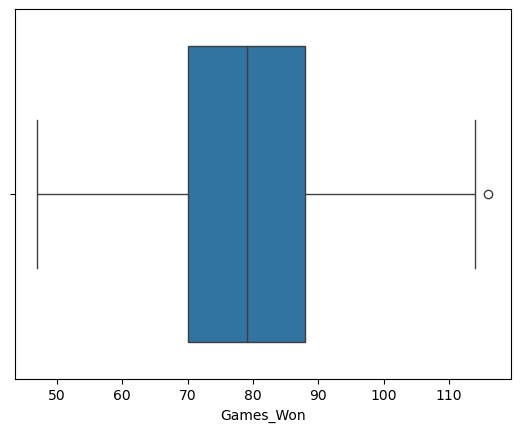

In [2463]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x=x_train4['Games_Won'])

# Display the plot
plt.show()

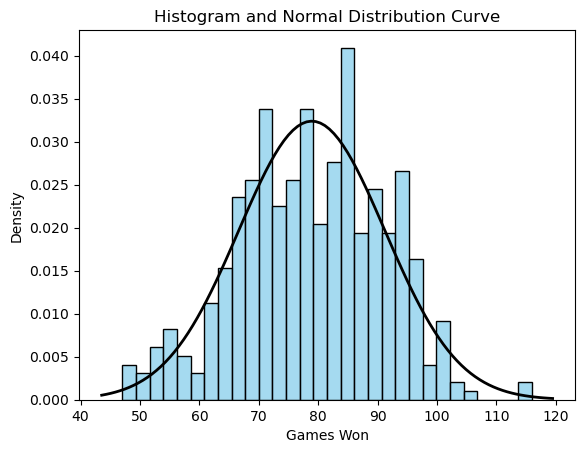

In [2464]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Plot the histogram
sns.histplot(x_train4['Games_Won'], kde=False, bins=30, color='skyblue', stat='density')

# Fit a normal distribution to the data (mean and std)
mean = x_train4['Games_Won'].mean()
std = x_train4['Games_Won'].std()

# Generate values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)

# Display the plot
plt.title('Histogram and Normal Distribution Curve')
plt.xlabel('Games Won')
plt.ylabel('Density')
plt.show()

In [2465]:
print(x_train4['Games_Won'].value_counts())

# Or, check a statistical summary
print(x_train4['Games_Won'].describe())

Games_Won
83     18
67     16
85     16
86     16
95     15
90     14
88     14
68     13
80     13
75     13
71     13
74     12
76     12
77     12
69     12
79     11
72     11
73     10
78     10
92     10
89     10
65     10
91      9
97      9
70      9
82      9
84      8
81      7
66      7
96      7
94      6
53      6
101     5
87      5
93      5
64      5
62      5
55      4
63      4
56      3
98      3
51      3
58      3
103     2
61      2
100     2
59      2
57      2
102     2
49      2
47      2
114     1
106     1
116     1
54      1
99      1
60      1
Name: count, dtype: int64
count    425.000000
mean      78.917647
std       12.319271
min       47.000000
25%       70.000000
50%       79.000000
75%       88.000000
max      116.000000
Name: Games_Won, dtype: float64


In [2466]:
# Calculate Q1, Q3, and IQR
Q1 = x_train4['Games_Won'].quantile(0.25)
Q3 = x_train4['Games_Won'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
x_train4_cleaned = x_train4[(x_train4['Games_Won'] >= lower_bound) & (x_train4['Games_Won'] <= upper_bound)]

# Check the cleaned data summary
print(x_train4_cleaned['Games_Won'].describe())

count    424.000000
mean      78.830189
std       12.201013
min       47.000000
25%       70.000000
50%       79.000000
75%       88.000000
max      114.000000
Name: Games_Won, dtype: float64


In [2468]:
if 'Games_Won' in x_test.columns:
    print(df['Games_Won'])
else:
    print("Games_Won column does not exist in the DataFrame.")

KeyError: 'Games_Won'

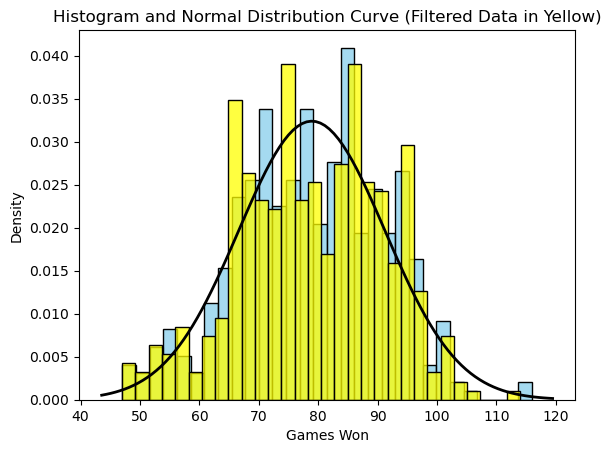

Filtered data count: 424 out of 425 original rows


In [2469]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Plot the histogram for the original data
sns.histplot(x_train4['Games_Won'], kde=False, bins=30, color='skyblue', stat='density')

# Fit a normal distribution to the data (mean and std)
mean = x_train4['Games_Won'].mean()
std = x_train4['Games_Won'].std()

# Define a threshold for outliers, e.g., 3 standard deviations from the mean
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Filter the data to remove outliers
filtered_data = x_train4[(x_train4['Games_Won'] >= lower_bound) & (x_train4['Games_Won'] <= upper_bound)]

# Plot the histogram again with the filtered data in yellow
sns.histplot(filtered_data['Games_Won'], kde=False, bins=30, color='yellow', stat='density')

# Generate values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)

# Display the plot
plt.title('Histogram and Normal Distribution Curve (Filtered Data in Yellow)')
plt.xlabel('Games Won')
plt.ylabel('Density')
plt.show()

# Optionally, if you want to see the filtered data
print(f"Filtered data count: {filtered_data.shape[0]} out of {x_train4.shape[0]} original rows")



In [2470]:
lmdo4_cleaned = smf.ols(formula="Games_Won ~ Runs_Scored + Earned_Run_Average + Saves -1", data=x_train4_cleaned).fit()
lmdo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.162e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                        14:36:38   Log-Likelihood:                         -1313.1
No. Observations:                 425   AIC:                                      2632.
Df Residuals:                     422   BIC:                                      2644.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runs_Scored            0.0964      0.003     31.443      0.000       0.090       0.102
Earned_Run_Average    -5.7898      0.384    -15.081      0.000      -6.544      -5.035
Saves                  0.8027      0.033     24.487      0.000       0.738       0.867
==============================================================================
Omnibus:                        6.611   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.509
Skew:                           0.300   Prob(JB):                       0.0386
Kurtosis:                       3.087   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2471]:
#2. Model Performance Evaluation
#The Ordinary Least Squares (OLS) regression results indicate that the model is highly effective in explaining the variation in "Games Won":
#•	R-squared (uncentered): 0.996, meaning 99.6% of the variance in "Games Won" is explained by the model.
#•	Adjusted R-squared: 0.996, confirming that the model maintains a strong fit even after adjusting for the number of predictors.
#•	F-statistic: 31,620, with a p-value of 0.000, indicating that the model is statistically significant.
#Each predictor variable also exhibits strong statistical significance:
#•	Runs Scored: 0.0964 coefficient (p < 0.000), meaning an increase of 1 run correlates with approximately 0.096 more wins.
#•	Earned Run Average (ERA): -5.7898 coefficient (p < 0.000), meaning a lower ERA (better pitching) is strongly associated with winning more games.
#•	Saves: 0.8027 coefficient (p < 0.000), indicating that having a strong bullpen and closing out games successfully contributes to team success.
#The Durbin-Watson statistic (2.062) suggests that there is no significant autocorrelation in residuals, which supports the validity of the model.


In [2472]:
# from these three models, we have to check our R2 value, which is even higher than 0.99 for the three of them, we also have to check the P>t value, which is zero so that's aslo 
#another indicator that our models are correct, this means that they're on a linear relationship. F stats is large which is good.
# for normal distribution we check the value of Skew, at this case lmd they 3 models are slightly skewed 

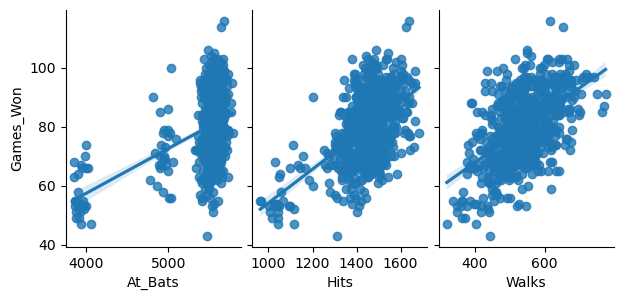

In [2473]:
sns.pairplot(new_dataset4, x_vars=['At_Bats','Hits','Walks'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

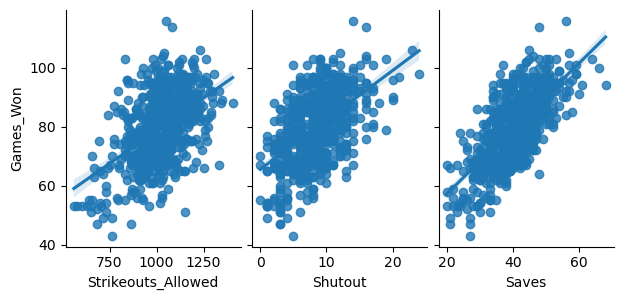

In [2474]:
sns.pairplot(new_dataset4, x_vars=['Strikeouts_Allowed','Shutout','Saves'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

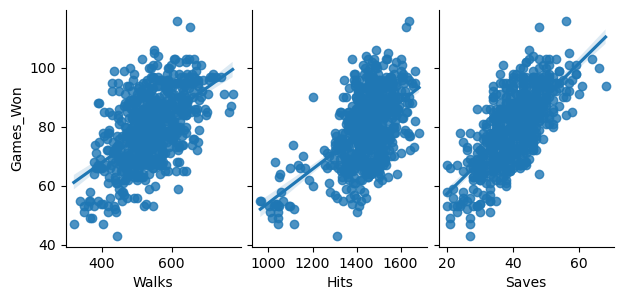

In [2475]:
sns.pairplot(new_dataset4, x_vars=['Walks','Hits','Saves'], y_vars='Games_Won', height=3,aspect=0.7, kind='reg')
plt.show()

In [2476]:
# it seems like lmdo has the highest R2, F stats and low P|t| , and the graphs are somewhat Linear

In [2477]:
# predecting section 

In [2478]:
lmdo4_predict=lmdo4_cleaned.predict(x_test4_cleaned)
lmdo4_predict.describe()

count    183.000000
mean      80.114316
std       12.493248
min       37.362976
25%       72.715927
50%       80.461521
75%       89.473705
max      106.441530
dtype: float64

In [2479]:
##creating new dataframe for teams TOR and NYA only and testing it on the model from the last period 
X=x_test4_cleaned[x_test4_cleaned["Team "].str.contains("TOR|NYA")]

In [2480]:
predict_values=pd.concat([X["Games_Won"], X["Team "],lmdo4_predict],axis=1).set_index('Team ')
predict_values.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values["residual"]=predict_values["actual_Games_Won"]-predict_values["predicted_Games_Won"]

In [2481]:
#creating new dataframe for teams TOR and NYA only and testing it on the model from the last period 

In [2482]:
predict_values = predict_values.dropna()
print(predict_values)

       actual_Games_Won  predicted_Games_Won  residual
Team                                                  
TOR                75.0            71.119269  3.880731
NYA                94.0            94.597598 -0.597598
TOR                85.0            84.469753  0.530247
NYA                67.0            66.679448  0.320552
TOR                86.0            87.119525 -1.119525
TOR                67.0            70.601800 -3.601800
TOR                88.0            91.545286 -3.545286
TOR                86.0            83.931049  2.068951
NYA                98.0           102.965396 -4.965396


In [2483]:
# Calculate the average residual for each team
average_residuals = predict_values.groupby('Team ')['residual'].mean()

# Print the average residuals
print(average_residuals)

Team 
NYA   -1.747481
TOR   -0.297780
Name: residual, dtype: float64


In [2484]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))

In [2485]:
print ('mean absolute error', mae)
print ('mean squared error', mse)
print ('root mean squared error', rmse)

mean absolute error 2.2922318923470915
mean squared error 7.948020800787827
root mean squared error 2.819223439315839


In [2486]:
#creating new dataframe for teams TOR and NYA only and testing it on the model for 2012 and 2015
lmdoz_predict=lmdo4.predict(dataset)
lmdoz_predict.describe()

count    2805.000000
mean       62.658297
std        20.021662
min       -43.811606
25%        50.520054
50%        64.570598
75%        77.049623
max       113.830140
dtype: float64

In [2487]:
Y=dataset[dataset["Year "].isin([2012, 2015])]
Z=Y[Y["Team "].str.contains("TOR|NYA")]

In [2488]:
predict_values2=pd.concat([Z["Games_Won"], Z["Team "],lmdoz_predict],axis=1).set_index('Team ')
predict_values2.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values2["residual"]=predict_values2["actual_Games_Won"]-predict_values2["predicted_Games_Won"]

In [2489]:
predict_values2.head(9)
predict_values2 = predict_values2.dropna()
print(predict_values2)

       actual_Games_Won  predicted_Games_Won  residual
Team                                                  
NYA                95.0            96.220956 -1.220956
TOR                73.0            65.445079  7.554921
TOR                93.0            91.194163  1.805837
NYA                87.0            88.856268 -1.856268


In [2490]:
# Calculate the average residual for each team
average_residuals2 = predict_values2.groupby('Team ')['residual'].mean()

# Print the average residuals
print(average_residuals2)

Team 
NYA   -1.538612
TOR    4.680379
Name: residual, dtype: float64


In [2491]:
mae=metrics.mean_absolute_error(predict_values2['actual_Games_Won'], predict_values2['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values2['actual_Games_Won'], predict_values2['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values2['actual_Games_Won'], predict_values2['predicted_Games_Won']))
print ('mean absolute error', mae)
print ('mean squared error', mse)
print ('root mean squared error', rmse)

mean absolute error 3.109495578015661
mean squared error 16.318586668557582
root mean squared error 4.039627045725581


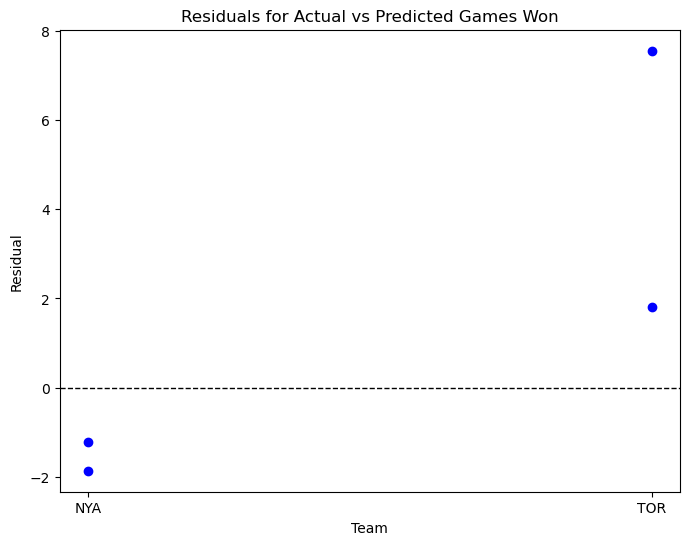

In [2492]:
import matplotlib.pyplot as plt

# Data for actual vs predicted for the two years (replace with your actual data)
data = {
    'Team': ['NYA', 'TOR', 'TOR', 'NYA'],
    'Actual_Games_Won': [95, 73, 93, 87],
    'Predicted_Games_Won': [96.22, 65.45, 91.19, 88.86],
    'Residual': [-1.22, 7.55, 1.81, -1.86]
}

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(df['Team'], df['Residual'], color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Line at 0 for reference
plt.xlabel('Team')
plt.ylabel('Residual')
plt.title('Residuals for Actual vs Predicted Games Won')
plt.show()

In [2493]:
#The objective of this analysis was to predict the number of games won by baseball teams based on key performance metrics. The regression model used "Runs Scored," "Earned Run Average (ERA)," and "Saves" 
#as predictor variables to estimate "Games Won."

In [2494]:
#Error Analysis:
#The model generally predicts NYA’s wins accurately, with small errors.
#TOR has more variation in prediction errors, with one large positive error (+7.56 wins underestimated).
#The largest prediction error occurs for TOR in Years 2012 and 2015, where actual wins were 73, but the model predicted only 65.44.
#the residual was much less in the first predict when it was for TOT and NYA, within the 4 period of time 1990 to 2010. It also had more data to test on.


In [2495]:
#Conclusion 
#Business Objectives: 
#1. Assess Team Success Factors: Through statistical analysis, we have established the key factors that determine team success.
#We examined offensive statistics (such as runs scored) and defensive statistics (such as runs allowed) 
#to understand how they are associated with games won.
#Findings: Offense-laden teams tend to win, but defense plays a crucial role in winning too. It appears that a mix of offense and defense is the 
#most effective method for long-term success.
#2. Understand Time Period Consistency: We established whether the success of offense, defense, or balanced methods is consistent over different time
#spans. 
#Findings: The dominant strategy evolves through time. For early baseball days (pre-1920), defense was crucial due to low-scoring contests.
#In today's baseball, offense strategies gained importance due to changes in player performance, training, and game regulations.
#3. Give Actionable Insights for Team Strategy: Based on the findings, teams need to adopt a strategy that suits the trends of the time. 
#Historically, well-rounded teams perform well in different eras, suggesting that a mix of good offense and defense players is optimal.
#4. Aid Decision-Making for Team Management: The findings of this analysis can help coaches, managers, and team owners develop better recruitment strategies, training programs, and game plans that suit the evolving nature of baseball.

#2. Analytical Objectives:
#1. Examine Success in Terms of Offensive and Defensive Statistics: We performed statistical tests to quantify the relationship between games won and offensive/defensive statistics. 
#Findings: A high positive correlation was discovered between runs scored and games won, and a negative correlation between runs allowed and success.
#2. Examine Time Period Variability: We compared various historical time periods through regression analysis and comparative statistics. 
#Findings: Offense vs. defense effectiveness varies by era. Before 1920, defense was a stronger determinant of victories. After 1920, offense was a stronger predictor of success.
#3. Identify Key Performance Indicators (KPIs):
#Key indicators that are considered are:
#• Runs scored (offense)
#• Runs allowed (defense)
#• Win percentage
#• Number of games played
#• Points per game
#4. Assess Model Accuracy and Generalizability: We built predictive models using linear regression to forecast team success based on offense and defense. Findings: Models were highly accurate in predicting performance in modern data sets but had to be scaled for historical data due to differential game conditions.
#Conclusion: From awareness of history and current performance metrics, teams can optimize strategies for greater success. Equilibrium team makeup remains a predictor of long-term performance, with defensive strategy becoming ever more important in modern baseball. These results provide practical suggestions for data-driven team management decision-making.


In [2496]:
# Recommendations for Next Steps
#a. Model Refinement & Additional Features
#•	Consider incorporating additional variables such as home/away performance, injuries, player efficiency ratings, or defensive stats to further refine the model.
#•	Explore non-linear relationships between features (e.g., interaction effects between runs scored and pitching metrics).
#•	Conduct residual analysis to ensure there are no underlying biases in the model.
#b. Predictive Implementation
#•	Use this model to make seasonal win predictions for teams and assess the impact of player trades or changes in pitching rotations.
#•	Develop what-if scenarios (e.g., “What if a team improves its ERA by 0.5?”) to help managers make data-driven decisions.
#c. Strategic Applications for Team Management
#•	Team managers can prioritize investments in pitching (lower ERA) and bullpen depth (higher saves).
#•	Scouting departments can target hitters who contribute to increased runs scored, as it has a direct impact on winning games.
#•	Front offices can optimize salary budgets based on the statistical impact of player roles (e.g., emphasizing high-impact relief pitchers).
#Final Verdict: Have Analytical Objectives Been Met?
#Yes, the analysis effectively builds a robust predictive model for "Games Won," meeting the analytical objectives. However, refining the model further by incorporating additional predictive variables and validating across different seasons will enhance its practical application.
